# Laboratório de Ciência de dados
### Projeto realizado por
##### Grupo 5
- Henrique Pacheco
- Miguel Rego

### Dataset
- Livros e Avaliações: Detalhes de Publicação, Autores, e Estatísticas de Popularidade

In [908]:
# Importação das bibliotecas utilizadas
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Constantes
FIG_SIZE = (10, 6)

### Descrição dos Dados
Fazendo uma pequena análise às features do dataset temos 3 colunas chaves que são bookID, title e authors, 7 features categóricas nomiais, 4 númericas quantitativas e 1 categórica ordinal

In [909]:
description = pd.read_csv('description.csv', delimiter=';', encoding='utf-8')
pd.set_option('display.max_columns', None)
pd.set_option('display.max_colwidth', None)

description

,Column,Key,Description,Measurement Scale
0,bookID,✓,Identificador para cada livro,Nomial
1,title,✓,Título do Livro,Nomial
2,authors,✓,Nome dos autores,Nomial
3,average_rating,X,Classificação média do livro,Quantitativa
4,isbn,X,Um identificador único de 10 dígitos para livros,Nomial
5,isbn13,X,Um identificador único de 13 dígitos para os livros,Nomial
6,language_code,X,Idioma do Livro,Nomial
7,num_pages,X,Número de páginas do livro,Quantitativa
8,ratings_count,X,Número de classificações que o livro recebeu,Quantitativa
9,text_reviews_count,X,O número de revisões de texto,Quantitativa


### Leitura dos dados
Fazendo a leitura dos dados, removemos 3 colunas irrelevantes para o nosso estudo, que são a coluna isbn13, isbn e bookID e damos skip nas linhas que possuem inconsistência e exibimos os 5 primeiros dados.

In [910]:
dados: pd.DataFrame = pd.read_csv('books.csv', delimiter=',', on_bad_lines='skip', encoding='utf-8')
dados: pd.DataFrame = dados.drop(columns=['isbn13','isbn','bookID'])
dados.head(5)

,title,authors,average_rating,language_code,num_pages,ratings_count,text_reviews_count,publication_date,publisher
0,Harry Potter and the Half-Blood Prince (Harry Potter #6),J.K. Rowling/Mary GrandPré,4.57,eng,652,2095690,27591,9/16/2006,Scholastic Inc.
1,Harry Potter and the Order of the Phoenix (Harry Potter #5),J.K. Rowling/Mary GrandPré,4.49,eng,870,2153167,29221,9/1/2004,Scholastic Inc.
2,Harry Potter and the Chamber of Secrets (Harry Potter #2),J.K. Rowling,4.42,eng,352,6333,244,11/1/2003,Scholastic
3,Harry Potter and the Prisoner of Azkaban (Harry Potter #3),J.K. Rowling/Mary GrandPré,4.56,eng,435,2339585,36325,5/1/2004,Scholastic Inc.
4,Harry Potter Boxed Set Books 1-5 (Harry Potter #1-5),J.K. Rowling/Mary GrandPré,4.78,eng,2690,41428,164,9/13/2004,Scholastic


# Pré-processamento

#### Verificação de dados null
Não existe nenhuma columa com dados null.

In [911]:
dados.isnull().sum()

title                 0
authors               0
average_rating        0
language_code         0
  num_pages           0
ratings_count         0
text_reviews_count    0
publication_date      0
publisher             0
dtype: int64

### Remoção dos espaços vazios dos nomes da coluna “num_pages”

In [912]:
dados.columns = dados.columns.str.lstrip()

### Conversão da coluna 'publication_date' para o tipo Datetime


In [913]:
dados['publication_date'] = pd.to_datetime(dados['publication_date'],format='%m/%d/%Y',errors='coerce')
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11123 entries, 0 to 11122
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   title               11123 non-null  object        
 1   authors             11123 non-null  object        
 2   average_rating      11123 non-null  float64       
 3   language_code       11123 non-null  object        
 4   num_pages           11123 non-null  int64         
 5   ratings_count       11123 non-null  int64         
 6   text_reviews_count  11123 non-null  int64         
 7   publication_date    11121 non-null  datetime64[ns]
 8   publisher           11123 non-null  object        
dtypes: datetime64[ns](1), float64(1), int64(3), object(4)
memory usage: 782.2+ KB


#### Nesta conversão verificamos que existem 2 valores null na 'publication_date'

In [914]:
dados[dados['publication_date'].isnull()]

,title,authors,average_rating,language_code,num_pages,ratings_count,text_reviews_count,publication_date,publisher
8177,In Pursuit of the Proper Sinner (Inspector Lynley #10),Elizabeth George,4.10,eng,718,10608,295,NaT,Bantam Books
11094,Montaillou village occitan de 1294 à 1324,Emmanuel Le Roy Ladurie/Emmanuel Le Roy-Ladurie,3.96,fre,640,15,2,NaT,Folio histoire


In [915]:
# Correção dos valores nulos
dados.loc[dados.index == 31373, 'publication_date'] = '2000-11-30'  
dados.loc[dados.index == 45531, 'publication_date'] = '1982-06-30'

### Substituindo "en-US", "en-GB", "en-CA", "enm" por "eng"

In [916]:
dados.language_code.unique()

array(['eng', 'en-US', 'fre', 'spa', 'en-GB', 'mul', 'grc', 'enm',
       'en-CA', 'ger', 'jpn', 'ara', 'nl', 'zho', 'lat', 'por', 'srp',
       'ita', 'rus', 'msa', 'glg', 'wel', 'swe', 'nor', 'tur', 'gla',
       'ale'], dtype=object)

In [917]:
dados['language_code']= dados['language_code'].replace(['en-US','en-GB','en-CA', "enm"],'eng')
dados.language_code.unique()

array(['eng', 'fre', 'spa', 'mul', 'grc', 'ger', 'jpn', 'ara', 'nl',
       'zho', 'lat', 'por', 'srp', 'ita', 'rus', 'msa', 'glg', 'wel',
       'swe', 'nor', 'tur', 'gla', 'ale'], dtype=object)

### Drop de colunas 'NOT A BOOK'

In [918]:
dados.loc[(dados['authors'] == 'NOT A BOOK')]

,title,authors,average_rating,language_code,num_pages,ratings_count,text_reviews_count,publication_date,publisher
1061,Murder by Moonlight & Other Mysteries (New Adventures of Sherlock Holmes 19-24),NOT A BOOK,4.00,eng,0,7,2,2006-10-03,Simon Schuster Audio
1064,The Unfortunate Tobacconist & Other Mysteries (Sherlock Holmes 1-6),NOT A BOOK,3.50,eng,0,12,1,2003-10-01,Simon & Schuster Audio
5474,The Goon Show Volume 4: My Knees Have Fallen Off!,NOT A BOOK,5.00,eng,2,3,0,1996-04-01,BBC Physical Audio
5475,The Goon Show: Moriarty Where Are You?,NOT A BOOK,4.43,eng,2,0,0,2005-03-30,BBC Physical Audio
5476,The Goon Show Volume 11: He's Fallen in the Water!,NOT A BOOK,5.00,eng,2,2,0,1995-10-02,BBC Physical Audio


In [919]:
dados = dados.loc[(dados['authors'] !=  'NOT A BOOK')]

### Questões
Analisando os dados, achamos pertinente as seguintes questões
 1. Existe alguma correlação entre as features quantitativas?
 2. Receção dos livros relativamente ao seu número de páginas. (Feature extraction)
 3. Qual distribuição do idioma dos livros?
 4. Qual é a distribuição da classificação dos livros?
 5. Qual o top 10 livros com maior rating?
 6. Top 10 autores por média de ratings (10+ Livros).
 7. Ranking dos top 10 autores por número de livros.

### 1. Existe alguma correlação entre as features quantitativas?
Feito o gráfico nós descobrimos que existe uma correlação relativamente forte entre as seguintes features: ratings_count e text_reviews_count, e uma relativamente fraca entre as colunas average_rating e num_pages.
Existe correlação elevada entre `ratings_count` e `text_reviews_count` (0,87) devido ao facto de os leitores que atribuem uma classificação tendem igualmente a escrever reviews. Ambas as variáveis refletem a popularidade do livro, contribuindo para esta forte relação.

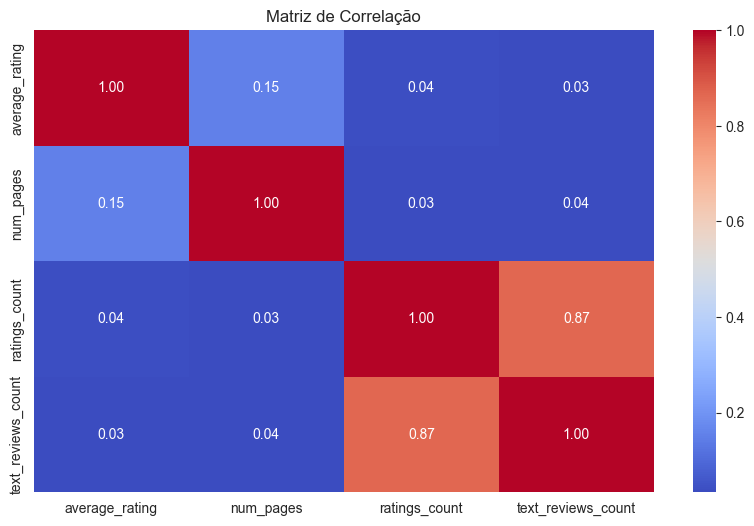

In [920]:
dados_clean: pd.DataFrame = dados.dropna(axis=1)
dados_clean: pd.DataFrame = dados_clean[[col for col in dados_clean if dados_clean[col].nunique() > 1]]
dados_numericos: pd.DataFrame = dados_clean.select_dtypes(include=[np.number])
corr: pd.DataFrame = dados_numericos.corr()
plt.figure(figsize=FIG_SIZE)
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Matriz de Correlação')
plt.show()

### 2. Receção dos livros relativamente ao seu número de páginas.

#### Feature extraction
O "rating_per_page" é uma nova feature que foi extraida a partir da divisão entre "ratings_count" e "num_pages", esta feature ajuda a medir a interação ou popularidade de um livro relativamente ao seu tamanho, livros com grande valor de "rating_per_page", pode ser um indicativo que recebem bastante atenção indpendentemente de serem grandes ou pequenos. 


In [921]:
dados.columns = dados.columns.str.strip()
dados['ratings_per_page'] = dados['ratings_count'] / dados['num_pages']
dados.dropna(subset=['ratings_per_page'], inplace=True) 

Com este gráfico de dispersão é possivel observar a relação entre o "Número Total de Avaliações" (eixo x) e "Avaliações Por Página" (eixo y).
A dispersão sugere que existem alguns livros muito avaliados (possivelmente muito populares ou atipicos) que recebem muitas avaliações em relação ao seu comprimento, enquanto a maioria dos livros recebe um número mais modesto de avaliações por página. A concentração densa no canto inferior esquerdo indica que este é provavelmente o padrão típico para a maioria dos livros no conjunto de dados.

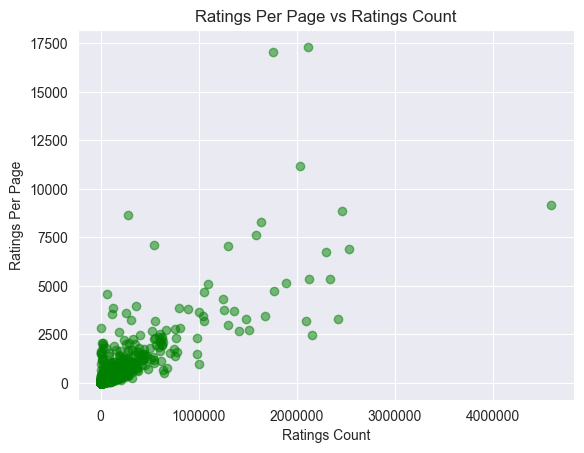

In [922]:
plt.scatter(dados['ratings_count'], dados['ratings_per_page'], alpha=0.5, color='green')
plt.ticklabel_format(style='plain', axis='x')
plt.title('Ratings Per Page vs Ratings Count')
plt.xlabel('Ratings Count')
plt.ylabel('Ratings Per Page')
plt.show()

É possivel observar que a maioria das avaliações se concentra abaixo das 2.500 avaliações por página para todos os grupos, porém existem alguns valores atípicos (outliers) notáveis, especialmente no grupo de páginas 101-300, onde se verifica um ponto que atinge aproximadamente 17.500 avaliações. É possível notar também uma tendência de diminuição na quantidade de pontos à medida que avançamos para grupos de páginas com números mais elevados, sugerindo que páginas com números mais altos (1001-2000, por exemplo) tendem a ter menos avaliações e menos variabilidade nas mesmas.

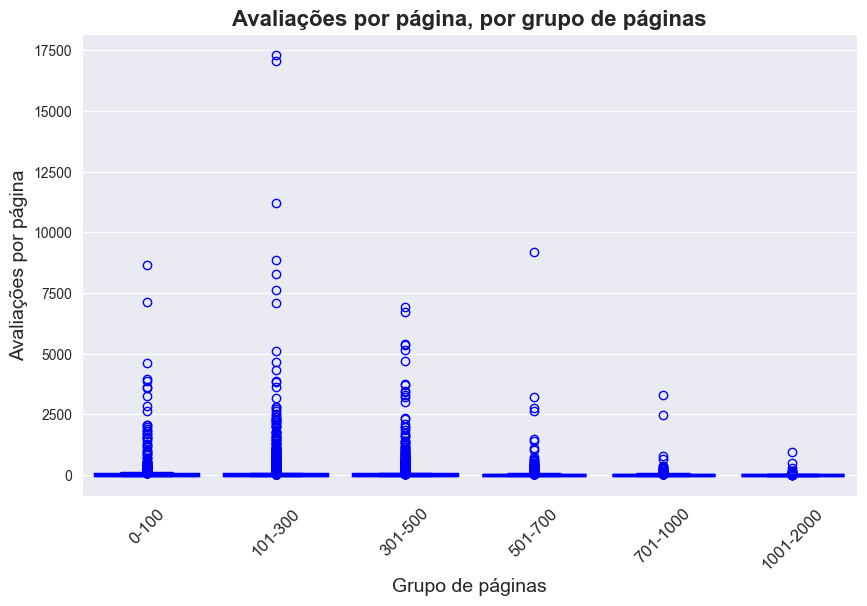

In [923]:
dados['page_group']= pd.cut(dados['num_pages'], bins=[0, 100, 300, 500, 700, 1000, 2000], labels=['0-100', '101-300', '301-500', '501-700', '701-1000', '1001-2000'])
plt.figure(figsize=FIG_SIZE)
sns.boxplot(x='page_group', y='ratings_per_page', data=dados, 
            linecolor='blue',
            linewidth=2.5)
plt.title('Avaliações por página, por grupo de páginas', fontsize=16, fontweight='bold')
plt.xlabel('Grupo de páginas', fontsize=14)
plt.ylabel('Avaliações por página', fontsize=14)
plt.xticks(rotation=45, fontsize=12)
plt.show()

Este gráfico de barras apresenta a média do número de avaliações por diferentes grupos de páginas, revelando uma tendência crescente até ao grupo 701-1000, seguida de uma queda significativa. O grupo de páginas 0-100 apresenta a menor média, com cerca de 5.000 avaliações, enquanto o grupo 701-1000 atinge o pico com aproximadamente 25.000 avaliações em média. Existe um aumento consistente na média de avaliações desde o primeiro grupo até ao grupo 701-1000, mas depois verifica-se uma diminuição acentuada no último grupo (1001-2000), que regista cerca de 19.000 avaliações em média, sugerindo que as páginas com numeração mais elevada tendem a receber menos avaliações.

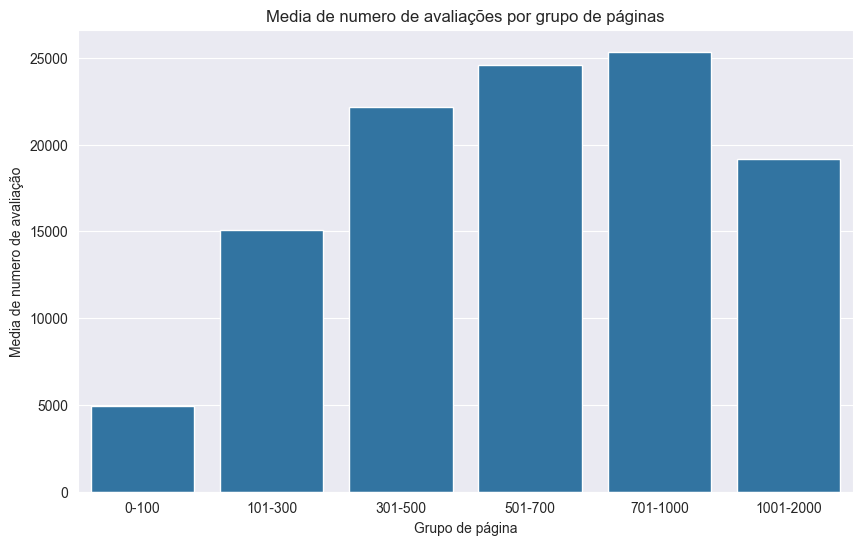

In [924]:
dados['page_group'] = pd.cut(dados['num_pages'], bins=[0, 100, 300, 500, 700, 1000, 2000], 
                                labels=['0-100', '101-300', '301-500', '501-700', '701-1000', '1001-2000'])
media_grupo_pagina = dados.groupby('page_group', observed=True)['ratings_count'].mean()
plt.figure(figsize=FIG_SIZE)
sns.barplot(x=media_grupo_pagina.index, y=media_grupo_pagina.values)
plt.title('Media de numero de avaliações por grupo de páginas')
plt.xlabel('Grupo de página')
plt.ylabel('Media de numero de avaliação')
plt.show()

### 3. Qual distribuição do idioma dos livros?
É demonstrada uma clara dominância do inglês no mercado editorial. Isto se deve à influência cultural e econômica do idioma no mercado.

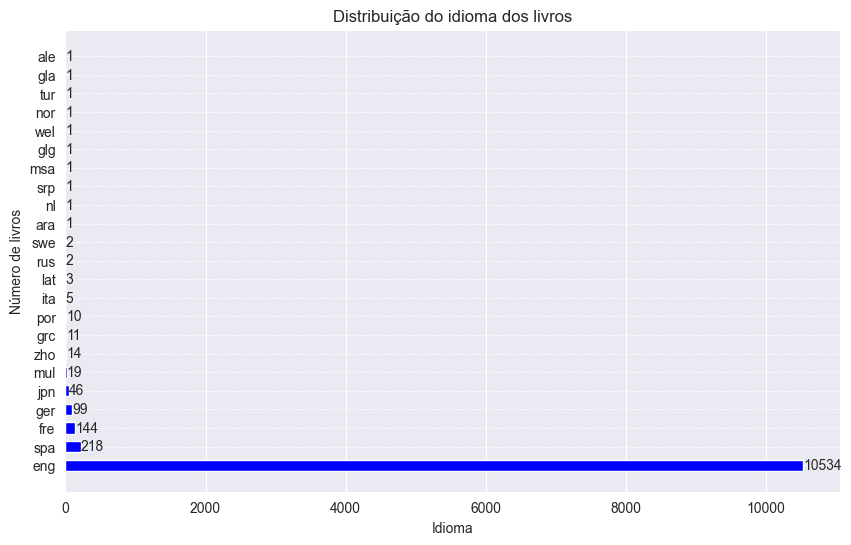

In [925]:
plt.figure(figsize=FIG_SIZE)
contagem_idiomas: int = dados['language_code'].value_counts()
barras: plt.barh = plt.barh(contagem_idiomas.index, contagem_idiomas.values, color='blue', height=0.6)


plt.xlabel('Idioma')
plt.ylabel('Número de livros')
plt.title('Distribuição do idioma dos livros')

plt.grid(axis='y', linestyle='--', alpha=0.7)

for barra in barras:
    valor_x: int = barra.get_width()
    plt.text(valor_x, barra.get_y() + barra.get_height() / 2, int(valor_x),
             ha='left', va='center', fontsize=10)
plt.show()

###  4. Qual é a distribuição da classificação dos livros?
Podemos observar que a maioria dos livros possui classificações médias entre 3,5 e 4,5, com o pico centrado em torno de 4, indicando que a maior parte dos livros são bem recebidos. A presença de algumas classificações próximas de 0 pode indicar a ausencia de açguns dados ou livros com poucas avaliações.

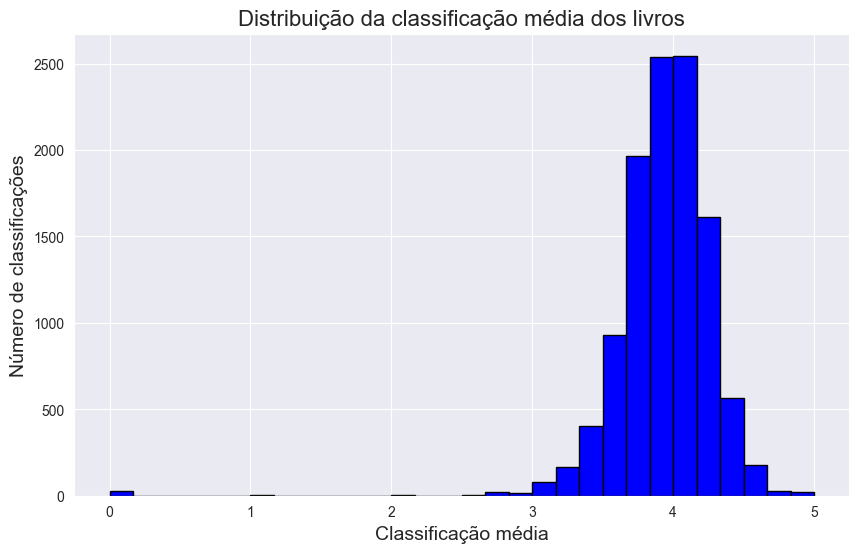

In [926]:
plt.figure(figsize=FIG_SIZE)
plt.hist(dados['average_rating'].astype('float'), bins=30, 
         color='blue', edgecolor='black', alpha=1.0) 
plt.xlabel('Classificação média', fontsize=14)
plt.ylabel('Número de classificações', fontsize=14)
plt.title('Distribuição da classificação média dos livros', fontsize=16)
plt.show()

 ### 5. Qual o top 10 livros com maior rating?

O gráfico revela os livros com maior número de classificações, onde *Twilight (Twilight #1)* lidera com mais de 4 milhões de avaliações. Esta posição destaca o fascínio dos adolescentes por narrativas românticas e sobrenaturais, especialmente aquelas que exploram temas de amor juvenil e descoberta pessoal. A presença de *Twilight* no topo demonstra como obras direcionadas ao público jovem podem conquistar uma base de leitores global e extremamente engajada, transcendendo fronteiras etárias e geográficas. Séries como *Harry Potter* reforçam este fenómeno, mostrando como literatura jovem pode criar comunidades de fãs apaixonados e influenciar profundamente a cultura popular.

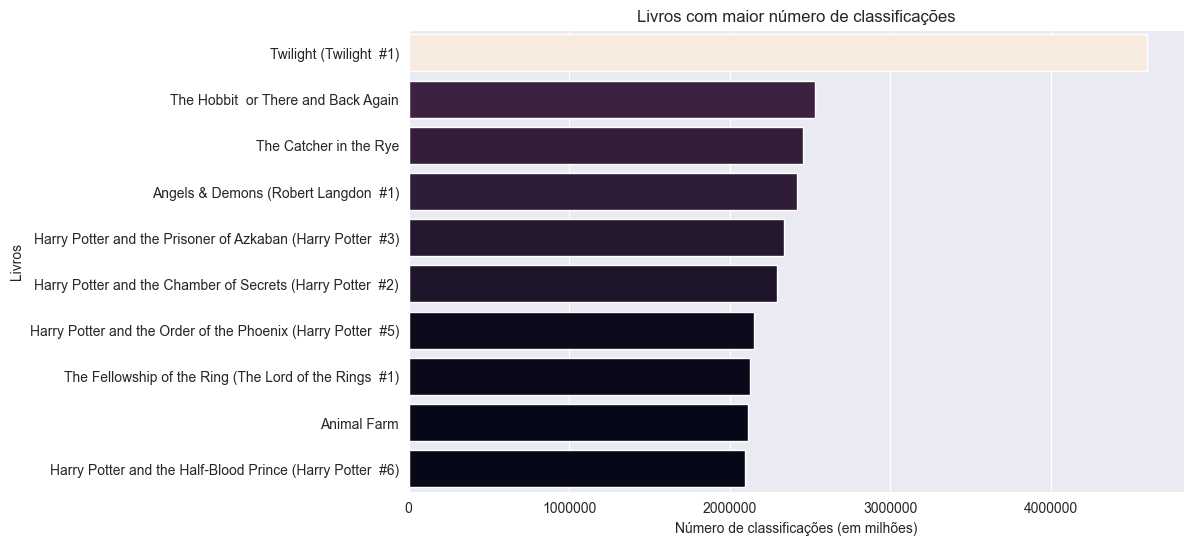

In [927]:
mais_avaliado: pd.DataFrame = dados.sort_values('ratings_count', ascending=False).head(10).set_index('title')
plt.figure(figsize=FIG_SIZE)
sns.barplot(x='ratings_count', y=mais_avaliado.index, data=mais_avaliado, hue='ratings_count', palette='rocket', legend=False)

plt.ticklabel_format(style='plain', axis='x')

plt.xlabel('Número de classificações (em milhões)')
plt.ylabel('Livros')
plt.title('Livros com maior número de classificações')
plt.show()

### 6. Top 10 autores por média de ratings (10+ Livros)
Podemos observar que os escritores de fantasia e manga japonês se destacam mais. No topo encontra-se a dupla Hiromu Arakawa/Akira Watanabe com uma média de 4,57, seguida pela J.K. Rowling (autora de Harry Potter) com 4,51 e J.R.R. Tolkien (autor de O Senhor dos Anéis) com 4,40. Existe uma forte presença de autores japoneses de manga (como Tite Kubo e Hirohiko Araki) a par de autores clássicos ocidentais como Jane Austen e P.G. Wodehouse, sendo que todos mantêm médias notavelmente altas, acima de 4,15.

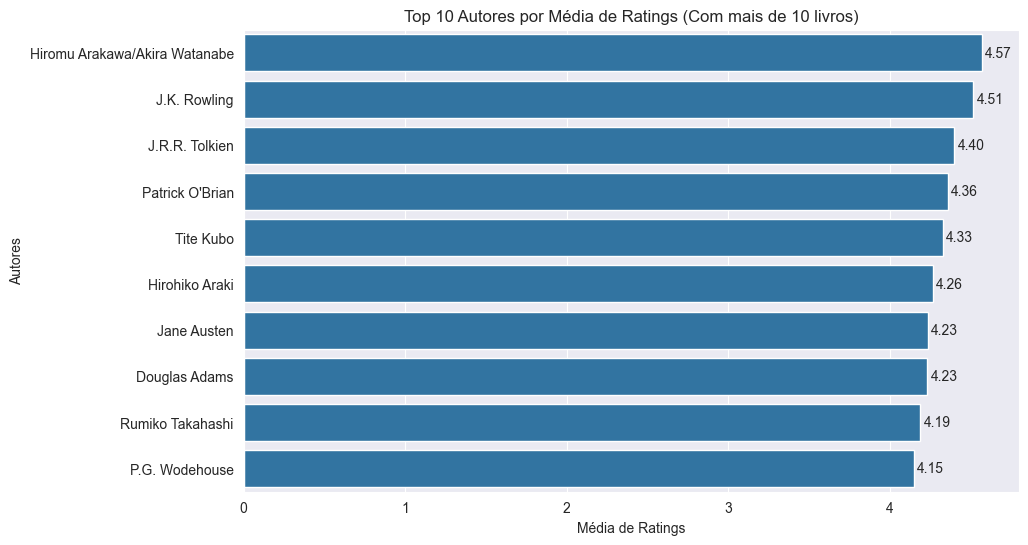

In [928]:
dados_limpos: pd.DataFrame = dados.dropna(subset=['authors', 'average_rating'])
contagem_livros_por_autor: int = dados_limpos['authors'].value_counts()
autores_com_mais_de_10_livros = contagem_livros_por_autor[contagem_livros_por_autor > 10].index
dados_filtrados: pd.DataFrame = dados_limpos[dados_limpos['authors'].isin(autores_com_mais_de_10_livros)]
media_rating_por_autor = dados_filtrados.groupby('authors')['average_rating'].mean()
top_10_autores_rating = media_rating_por_autor.nlargest(10)

plt.figure(figsize=(10, 6))
sns.barplot(x=top_10_autores_rating.values, y=top_10_autores_rating.index, orient='h')

for i, v in enumerate(top_10_autores_rating.values):
    plt.text(v + 0.02, i, f'{v:.2f}', va='center')

plt.xlabel('Média de Ratings')
plt.ylabel('Autores')
plt.title('Top 10 Autores por Média de Ratings (Com mais de 10 livros)')
plt.show()

 ### 7. Ranking dos top 10 autores por número de livros.
 Este gráfico apresenta o Top 10 de autores com base no número de livros publicados, onde P.G. Wodehouse lidera com aproximadamente 40 obras, seguidopor Stephen King e Rumiko Takahashi, ambos com cerca de 38 livros. É interessante o facto de P.G. Wodehouse, que aparecia em último lugar no ranking anterior de classificações médias, surgir aqui como o autor mais proativo do top 10.

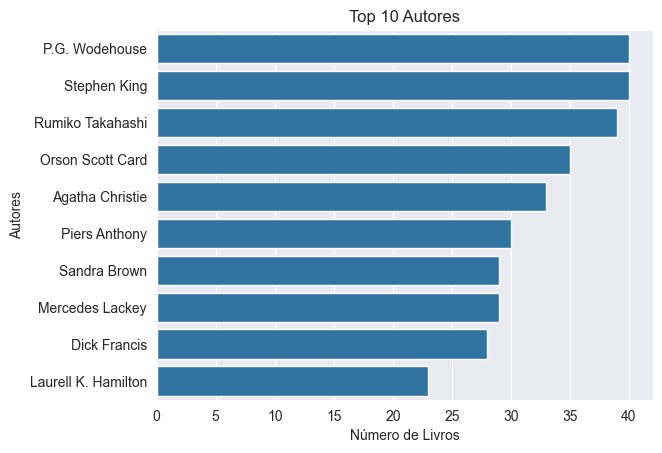

In [929]:
top_10_autores: int = dados['authors'].value_counts().nlargest(10)
sns.barplot(x=top_10_autores.values, y=top_10_autores.index)
plt.xlabel('Número de Livros')
plt.ylabel('Autores')
plt.title('Top 10 Autores')
plt.show()

# RAC 2

In [930]:
# Importação dos módulos
from scipy.cluster.hierarchy import linkage, dendrogram, fcluster
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score, GridSearchCV


### 1º Seleção de features

Para a análise dos clusters, optamos por selecionar as seguintes features quantitativas:
- average_rating
- num_pages
- ratings_count
- text_reviews_count

Estas features são relevantes porque podem captar características relacionadas à recepção e popularidade dos livros.

## 2º Análise Hierárquica

Os dendrogramas gerados mostram os resultados da clusterização hierárquica usando três métodos de ligação diferentes: Ward, Complete e Average.

*Ligação Ward*: A linha de corte em torno de 40 resulta em três clusters. O Cluster 1 (pequeno) possui valores muito altos em ratings_count e text_reviews_count, indicando que pode conter livros extremamente populares. O Cluster 2 aparece como um grupo mais moderado, com um número maior de amostras e valores relativamente altos para num_pages. O Cluster 3 inclui a maioria das amostras, com valores médios mais baixos, sugerindo que é um grupo mais típico em termos de avaliação e popularidade.

Distribuição e Características:
 - Cluster 1: Contém livros com popularidade muito alta.
 - Cluster 2: Livros de popularidade média com um maior número de páginas.
 - Cluster 3: A maioria das amostras, com classificações mais baixas e um número menor de páginas, em média.

*Ligação Complete*: Com uma linha de corte em torno de 20, observamos três clusters. O Cluster 3 é dominante, com 1105 amostras, indicando um agrupamento maior de livros semelhantes. Isto sugere uma maior dispersão nas distâncias internas dentro dos clusters, em comparação com o método Ward. Os Clusters 1 e 2 são pequenos, captando livros únicos ou outliers com características específicas.

Distribuição e Características:
 - Cluster 1: Muito poucas amostras, possivelmente representando outliers de alto valor em termos de popularidade ou avaliação.
 - Cluster 2: Um número de amostras semelhante ao do Cluster 1, potencialmente captando outro grupo distinto de outliers.
 - Cluster 3: A maioria dos livros com uma ampla variabilidade, dada a maior dispersão interna.

*Ligação Average*: Com uma linha de corte em aproximadamente 15, o dendrograma forma três clusters. Aqui, a estrutura de clusterização é mais equilibrada, e o Cluster 3 contém livros com as classificações de popularidade mais altas (como mostrado pelos valores médios). Os Clusters 1 e 2 são bastante semelhantes, mas parecem captar diferentes categorias de livros com base em popularidade e classificações moderadas.

Distribuição e Características:
 - Cluster 1: Contém uma mistura de livros com métricas de popularidade médias.
 - Cluster 2: Semelhante ao Cluster 1 em termos de popularidade, mas pode diferir em características específicas como num_pages.
 - Cluster 3: O menor número de livros, mas com as métricas de popularidade mais altas, potencialmente captando bestsellers ou livros altamente avaliados.

Em resumo, o método Ward parece eficaz se o objetivo for uma clusterização bem definida e compacta de livros com base na popularidade e nas classificações. Se o interesse for explorar grupos variados ou únicos, a ligação Complete é benéfica, enquanto o método Average fornece uma abordagem mais moderada.


Método: ward
Distribuição dos clusters:
1      6
2    202
3    904
Name: count, dtype: int64

Média das variáveis por cluster:
              average_rating  num_pages  ratings_count  text_reviews_count
cluster_ward                                                              
1                       4.25     508.83     1191757.50            22415.50
2                       4.12     662.51        6678.78              242.86
3                       3.87     256.54       10130.74              375.85

Método: complete
Distribuição dos clusters:
1    1108
2       3
3       1
Name: count, dtype: int64

Média das variáveis por cluster:
                  average_rating  num_pages  ratings_count  text_reviews_count
cluster_complete                                                              
1                           3.92     330.64       10477.14              383.12
2                           4.17     667.67     1236530.33            20834.33
3                           4.56     435.00   

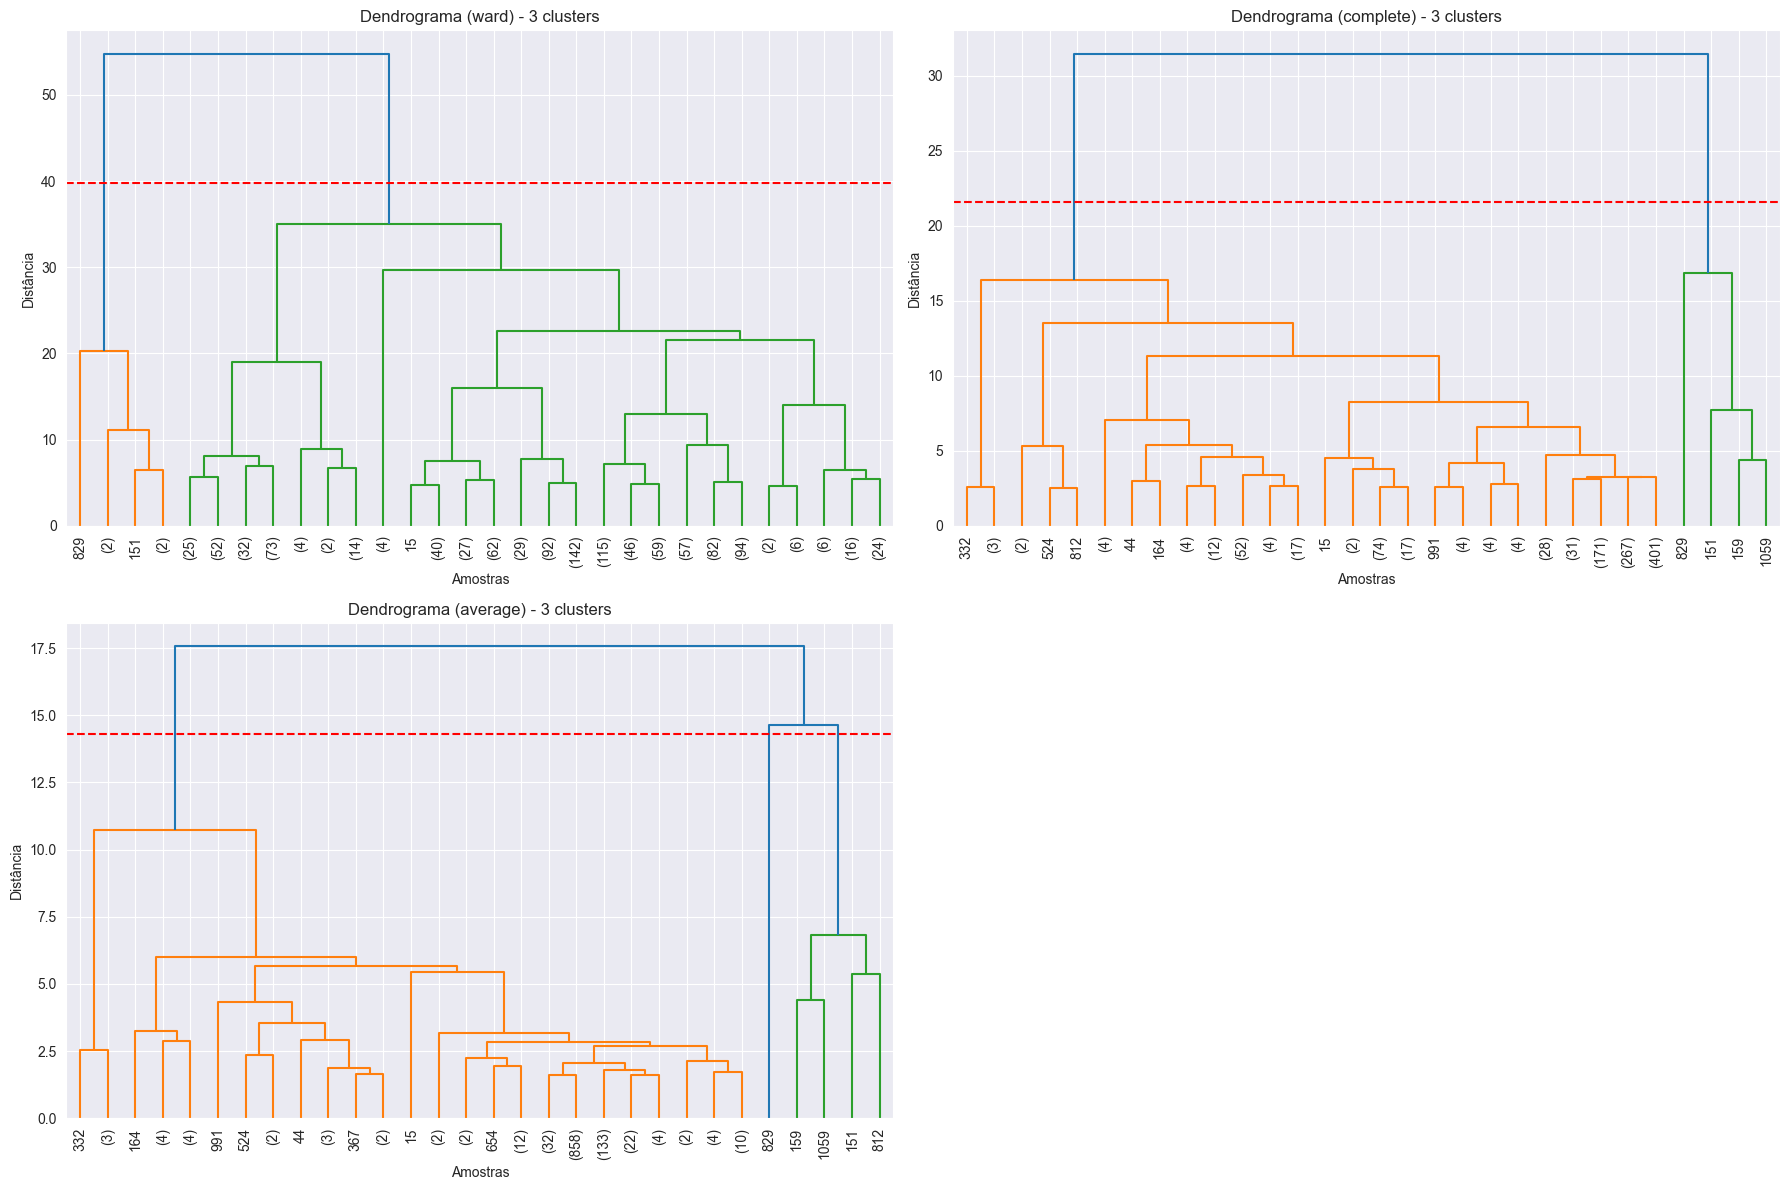

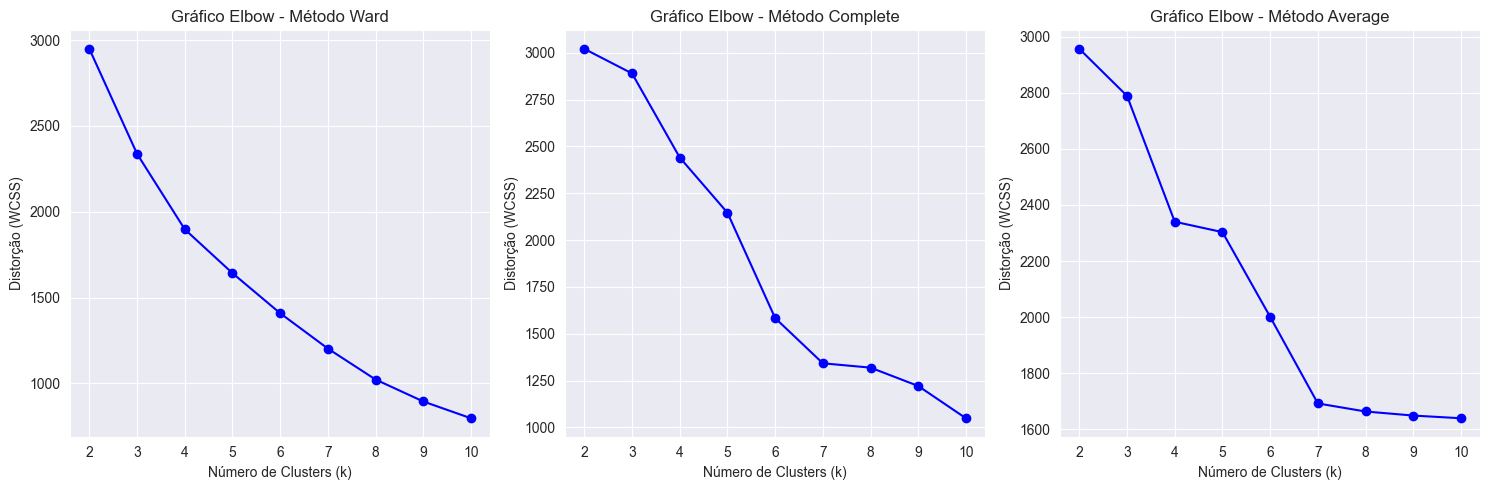

In [931]:
amostra_dados: pd.DataFrame = dados.sample(frac=0.1, random_state=42)

variaveis: list[str] = ['average_rating', 'num_pages', 'ratings_count', 'text_reviews_count']
X_amostra: pd.Series = amostra_dados[variaveis]

normalizador: StandardScaler = StandardScaler()
X_amostra_normalizada = normalizador.fit_transform(X_amostra)

metodos_ligacao: list[str] = ['ward', 'complete', 'average']
n_clusters: int = 3

matrizes_ligacao: dict = {}
clusters_por_metodo: dict = {}


for metodo in metodos_ligacao:
    try:
        matrizes_ligacao[metodo] = linkage(X_amostra_normalizada, method=metodo)

        clusters: fcluster = fcluster(matrizes_ligacao[metodo], t=n_clusters, criterion='maxclust')
   
        clusters_por_metodo[metodo] = clusters
 
        coluna_cluster: str = f'cluster_{metodo}'
        amostra_dados[coluna_cluster] = clusters
      
        print(f"\nMétodo: {metodo}")
        print("Distribuição dos clusters:")
        distribuicao_clusters = pd.Series(clusters).value_counts().sort_index()
        print(distribuicao_clusters)
        
        print("\nMédia das variáveis por cluster:")
        medias_clusters: pd.Series = amostra_dados.groupby(coluna_cluster)[variaveis].mean().round(2)
        print(medias_clusters)
        
    except Exception as e:
        print(f"Erro ao processar método {metodo}: {str(e)}")

plt.figure(figsize=(18, 12))

for i, metodo in enumerate(metodos_ligacao):
    try:
        plt.subplot(2, 2, i + 1)
        dendrogram(
            matrizes_ligacao[metodo],
            truncate_mode='lastp', 
            p=30,  
            leaf_rotation=90, 
            leaf_font_size=10 
        )
        
        altura_corte = np.mean(matrizes_ligacao[metodo][-n_clusters:, 2])
        plt.axhline(y=altura_corte, color='r', linestyle='--')
        
        plt.title(f'Dendrograma ({metodo}) - {n_clusters} clusters')
        plt.xlabel('Amostras')
        plt.ylabel('Distância')
        
    except Exception as e:
        print(f"Erro ao plotar dendrograma para método {metodo}: {str(e)}")

plt.tight_layout()
plt.show()

k_range = range(2, 11)

distorcao_por_metodo = {metodo: [] for metodo in metodos_ligacao}

for metodo in metodos_ligacao:
    try:
   
        linkage_matrix = matrizes_ligacao[metodo]
        
        for k in k_range:
        
            clusters = fcluster(linkage_matrix, t=k, criterion='maxclust')
            wcss = 0
            for i in range(1, k + 1):
                cluster_points = X_amostra_normalizada[clusters == i]
                if len(cluster_points) > 0:
                    centroid = np.mean(cluster_points, axis=0)
                    wcss += np.sum((cluster_points - centroid) ** 2)
            
            distorcao_por_metodo[metodo].append(wcss)
            
    except Exception as e:
        print(f"Erro ao processar método {metodo}: {str(e)}")

plt.figure(figsize=(15, 5))

for i, metodo in enumerate(metodos_ligacao):
    plt.subplot(1, 3, i + 1)
    try:
        plt.plot(k_range, distorcao_por_metodo[metodo], 'bo-')
        plt.xlabel('Número de Clusters (k)')
        plt.ylabel('Distorção (WCSS)')
        plt.title(f'Gráfico Elbow - Método {metodo.capitalize()}')
        plt.grid(True)
        
    except Exception as e:
        print(f"Erro ao plotar gráfico elbow para método {metodo}: {str(e)}")

plt.tight_layout()
plt.show()

A partir dos gráficos Elbow apresentados acima, podemos fazer várias interpretações importantes:

### Método Ward:

Mostra uma curva mais suave e consistente.
Há uma dobra (elbow) mais evidente entre k=3 e k=4
A partir de k=6, a redução na distorção (WCSS) começa a diminuir mais gradualmente.
Sugere-se que 3 ou 4 clusters podem ser uma boa escolha para este método.


### Método Complete:

Apresenta uma curva menos acentuada que o método Ward
Tem uma redução mais gradual na distorção
Mostra uma mudança mais notável na inclinação em k=3 e outra em k=8 logo
o número ideal de clusters para este método seria 3 ou 8. 
A redução na distorção é menos pronunciada após k=8.

### Método Average:

Mostra um padrão diferente dos outros métodos,
tem uma queda mais abrupta entre k=6 e k=8.
A curva se estabiliza mais após k=8.
Sugere que 7 ou 8 clusters poderiam ser considerados para este método.


## 3º Algoritmos não hierárquicos
A análise deste gráfico de dispersão, que representa clusters de livros com base no número de avaliações (ratings_count) e na classificação média (average_rating), permite observar a seguinte segmentação de clusters identificada pelo algoritmo K-Means:

Cluster 0 (Pontos roxos):

A maioria dos pontos pertence a este cluster, concentrando-se no intervalo de classificações médias entre 3,5 e 4,5.
Estes livros têm, em geral, um número relativamente reduzido de avaliações, no intervalo entre 0 e 200.000.
Este cluster poderá representar livros que são bem acolhidos, mas que não têm uma visibilidade ou popularidade tão expressiva quanto os de outros clusters.

Cluster 1 (Pontos verdes):

Este cluster contém livros com classificações médias também no intervalo de 3,5 a 4,5, mas com um número moderado de avaliações, variando entre 200.000 e 1 milhão.
Estes livros parecem ter maior popularidade ou reconhecimento, atraindo um número superior de avaliações, embora não tão elevado quanto o Cluster 2.
Este cluster poderá representar livros populares com uma receção bastante positiva, mas que ainda não alcançaram os níveis de classificação e número de avaliações mais expressivos.

Cluster 2 (Pontos amarelos):

Este cluster caracteriza-se por livros que possuem o maior número de avaliações (superior a 1 milhão), com classificações médias elevadas, próximas de 4,0 e 4,5.
Estes pontos representam livros extremamente populares, que atraem uma quantidade enorme de avaliações e mantêm uma média alta, indicando uma receção consistentemente positiva.
Este cluster pode ser identificado como o dos "bestsellers" ou dos "livros de elevada popularidade" no conjunto de dados.

A escolha de 3 clusters faz sentido porque consegue capturar bem a estrutura dos dados sem excessiva fragmentação, conforme indicado pelo método do cotovelo. Essa divisão em 3 grupos distintos, com o Cluster 0 contendo os piores resultados, o Cluster 1 os intermediários e o Cluster 2 os melhores desempenhos, facilita a interpretação e a compreensão dos diferentes perfis de algoritmos. Além disso, a consistência dessa estrutura em 3 clusters entre os diferentes métodos de clustering aplicados reforça a robustez dessa solução, tornando-a uma boa opção que equilibra a capacidade de capturar os padrões nos dados, a interpretabilidade dos resultados e a estabilidade da segmentação.

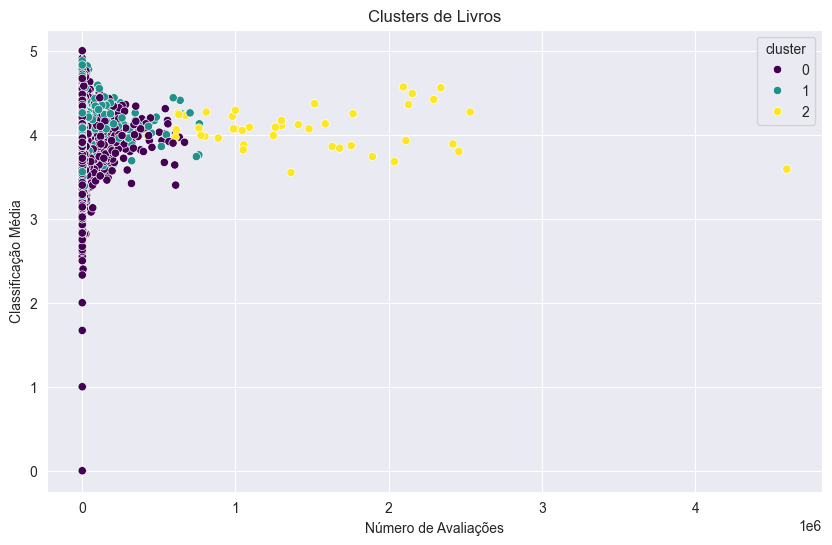

In [932]:
# Número de clusters
n_clusters: int = 3

# Seleção das variáveis quantitativas
variaveis: list[str] = ['average_rating', 'num_pages', 'ratings_count', 'text_reviews_count']
X: pd.DataFrame = dados[variaveis]

# Normalização dos dados
normalizador: StandardScaler = StandardScaler()
X_normalizado = normalizador.fit_transform(X)

# Aplicação do K-Means
kmeans: KMeans = KMeans(n_clusters=n_clusters, random_state=42)
dados['cluster'] = kmeans.fit_predict(X_normalizado)

# Visualização dos clusters
plt.figure(figsize=(10, 6)) 
sns.scatterplot(data=dados, x='ratings_count', y='average_rating', hue='cluster', palette='viridis')
plt.title('Clusters de Livros')
plt.xlabel('Número de Avaliações')
plt.ylabel('Classificação Média')
plt.show()

O outlier no gráfico parece ser o livro "The Diamond Color Meditation: Color Pathway to the Soul". Este livro tem uma classificação média excecionalmente alta de 5,0, mas um número relativamente baixo de avaliações, cerca de 54.000.
A presença deste outlier sugere que, embora o livro tenha recebido críticas muito positivas dos seus leitores, não alcançou o mesmo nível de popularidade e envolvimento generalizado que alguns dos outros livros do conjunto de dados, que contam com milhões de avaliações. Este outlier provavelmente representa um livro que encontrou um público dedicado e de nicho que o classificou positivamente, mas que não conseguiu atingir a mesma popularidade de massa.

In [933]:
outlier = dados.loc[dados['average_rating'] == dados['average_rating'].max()]
outlier[['title', 'average_rating', 'ratings_count']]

,title,average_rating,ratings_count
624,Comoediae 1: Acharenses/Equites/Nubes/Vespae/Pax/Aves,5.0,0
786,Willem de Kooning: Late Paintings,5.0,1
855,Literature Circle Guide: Bridge to Terabithia: Everything You Need For Successful Literature Circles That Get Kids Thinking Talking Writing—and Loving Literature,5.0,4
1243,Middlesex Borough (Images of America: New Jersey),5.0,2
4125,Zone of the Enders: The 2nd Runner Official Strategy Guide,5.0,2
4788,The Diamond Color Meditation: Color Pathway to the Soul,5.0,5
4933,Bulgakov's the Master and Margarita: The Text as a Cipher,5.0,4
5023,The Complete Theory Fun Factory: Music Theory Puzzles and Games for the Early Grades,5.0,1
5647,Winchester Shotguns,5.0,2
5648,Colossians and Philemon: A Critical and Exegetical Commentary (International Critical Commentary),5.0,1


## 4ª Tabelas groupby e gráficos de extremos e quartis

*Classificação Média (Primeiro Gráfico)*:


 - Cluster 1 (Classificação Moderada, Páginas Moderadas): Mostra classificações intermédias, com maior variabilidade
 - Cluster 2 (Altamente Classificado, Muitas Páginas): Apresenta as classificações mais elevadas e consistentes, com mediana próxima de 4,2
 - Cluster 3 (Classificação Baixa, Poucas Páginas): Tem classificações mais baixas em comparação com os outros clusters, mas ainda relativamente elevadas (mediana próxima de 4,0)

*Número de Páginas (Segundo Gráfico)*:


 - Cluster 1: Apresenta livros de extensão moderada
 - Cluster 2: Contém livros significativamente mais extensos, com alguns valores atípicos chegando a mais de 6000 páginas
 - Cluster 3: Agrupa os livros mais curtos, com menor variação no número de páginas


*Número de Avaliações (Terceiro Gráfico)*:


 - Clusters 1 e 2: Apresentam números de avaliações significativamente menores e mais semelhantes entre si
 - Cluster 3: Surpreendentemente, possui o maior número de avaliações em média, com alguns livros a atingir mais de 4 milhões de avaliações


*Número de Críticas Textuais (Quarto Gráfico)*:


 - Clusters 1 e 2: Mostram números menores de críticas textuais, com distribuições semelhantes
 - Cluster 3: Também lidera em número de críticas textuais, com mediana mais elevada e alguns casos extremos

*Conclusões principais*:

Existe uma correlação interessante onde os livros mais curtos (Cluster 3) tendem a receber mais avaliações e críticas, apesar de terem classificações médias ligeiramente inferiores
Os livros mais extensos (Cluster 2) tendem a receber melhores classificações, mas menos avaliações
O Cluster 1 representa um grupo intermédio em praticamente todas as métricas

*Padrões interessantes*:

Os livros mais populares (em termos de número de avaliações) não são necessariamente os mais bem classificados
Existe uma possível relação inversa entre a extensão do livro e o número de avaliações/críticas que recebe
Todos os clusters mostram valores atípicos significativos, indicando grande variabilidade dentro de cada grupo

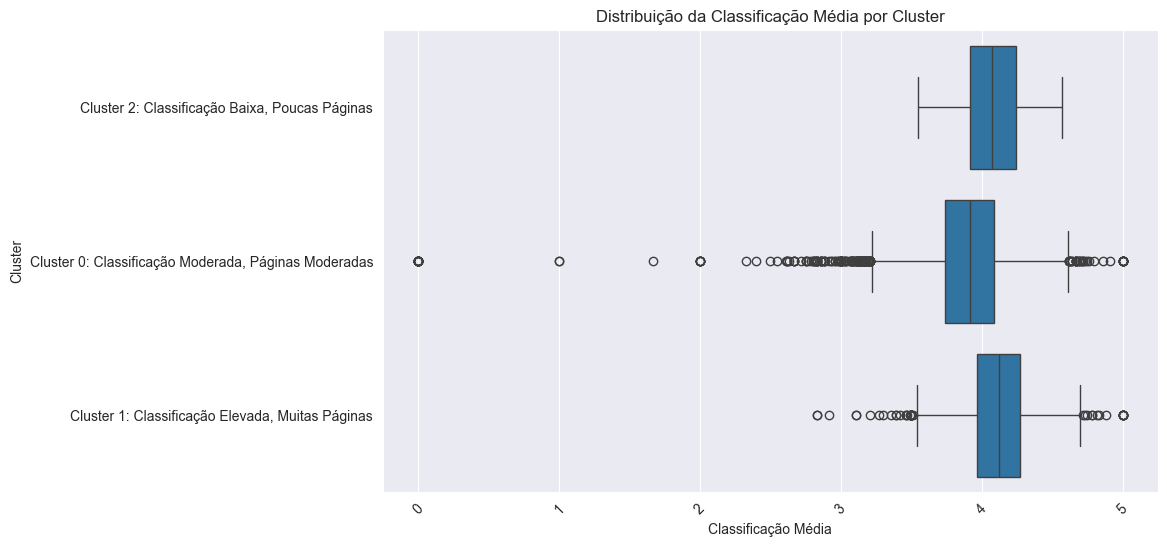

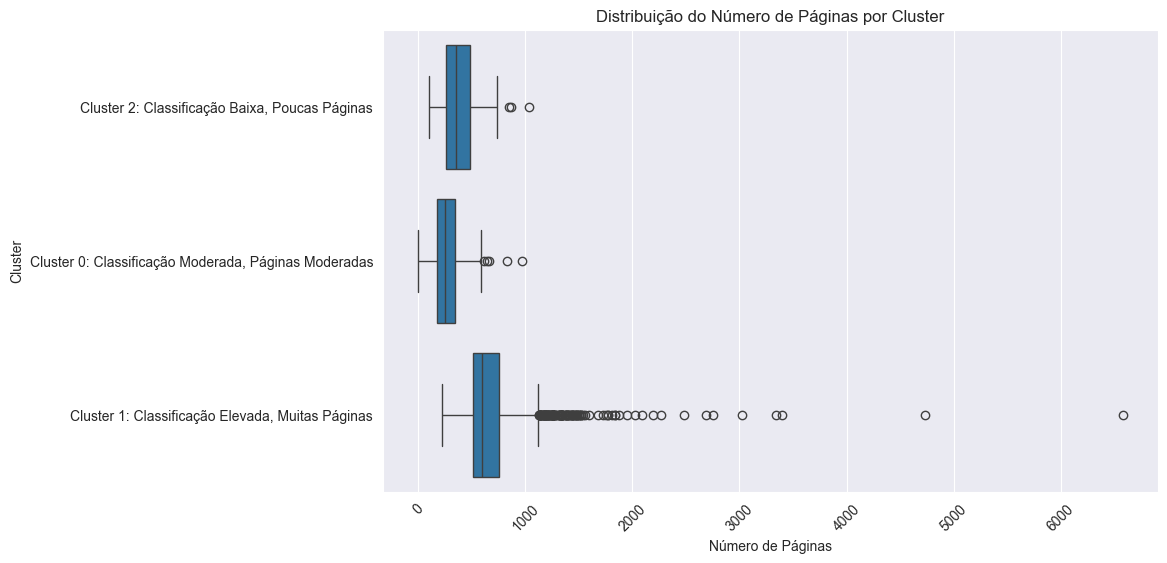

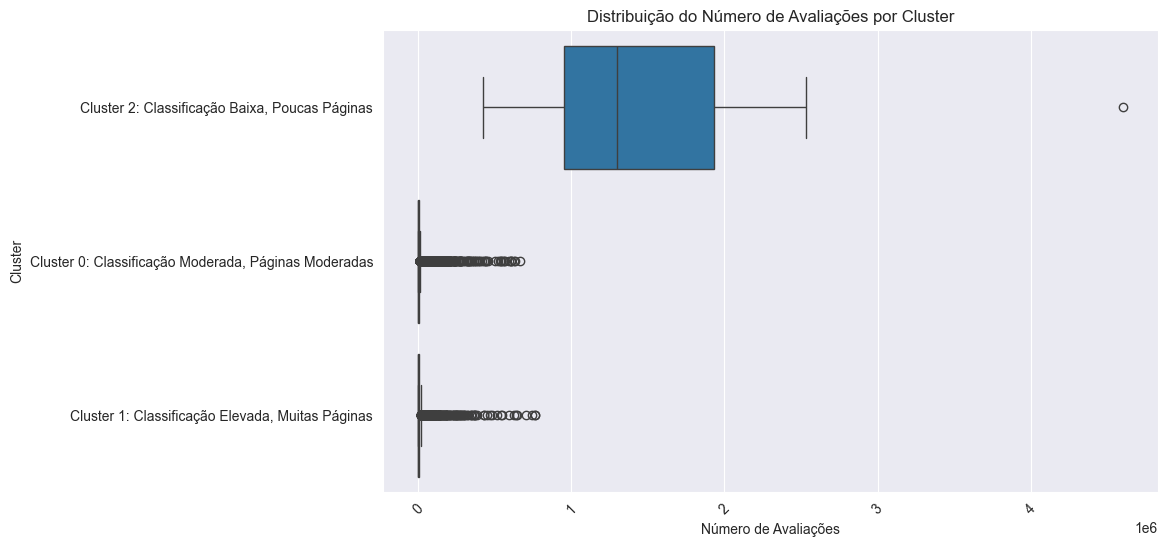

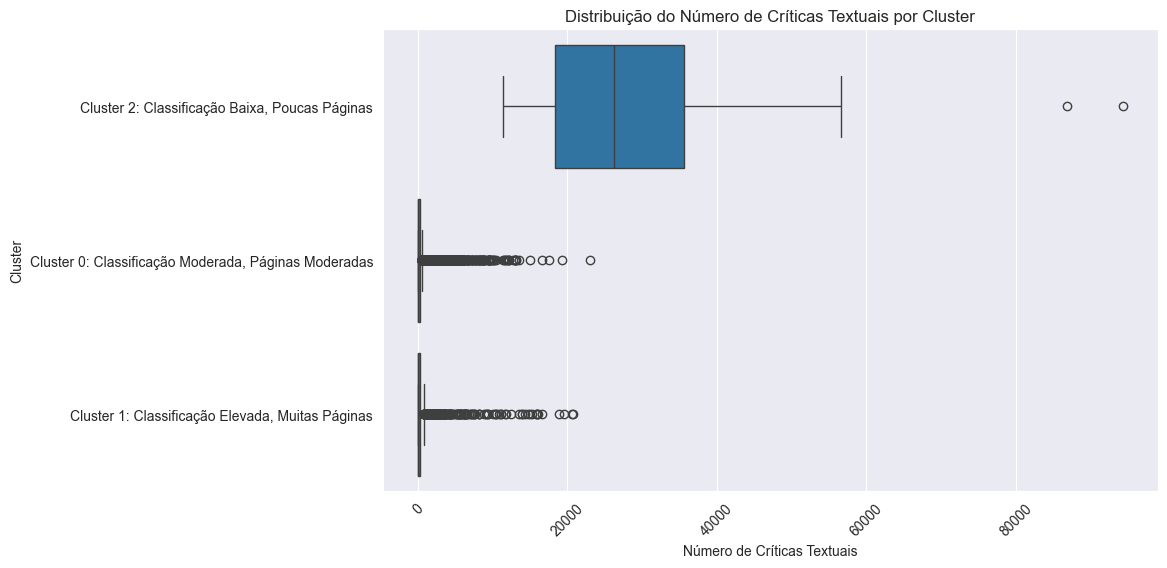

In [934]:

cluster_summary = dados.groupby('cluster').agg({
    'average_rating': ['mean', 'median', 'min', 'max', 'std'],
    'num_pages': ['mean', 'median', 'min', 'max', 'std'],
    'ratings_count': ['mean', 'median', 'min', 'max', 'std'],
    'text_reviews_count': ['mean', 'median', 'min', 'max', 'std']
})

nomes_cluster = {
   0: 'Cluster 0: Classificação Moderada, Páginas Moderadas',
   1: 'Cluster 1: Classificação Elevada, Muitas Páginas', 
   2: 'Cluster 2: Classificação Baixa, Poucas Páginas'
}

dados['nome_cluster'] = dados['cluster'].map(nomes_cluster)

dados.to_csv('dados_com_clusters.csv', index=False)

# Boxplot para a classificação média
plt.figure(figsize=FIG_SIZE)
sns.boxplot(y='nome_cluster', x='average_rating', data=dados)
plt.title('Distribuição da Classificação Média por Cluster')
plt.ylabel('Cluster') 
plt.xlabel('Classificação Média')
plt.xticks(rotation=45)
plt.show()

# Boxplot para o número de páginas
plt.figure(figsize=FIG_SIZE)
sns.boxplot(y='nome_cluster', x='num_pages', data=dados)
plt.title('Distribuição do Número de Páginas por Cluster')
plt.ylabel('Cluster')
plt.xlabel('Número de Páginas')
plt.xticks(rotation=45)
plt.show()

# Boxplot para o número de avaliações
plt.figure(figsize=FIG_SIZE)
sns.boxplot(y='nome_cluster', x='ratings_count', data=dados)
plt.title('Distribuição do Número de Avaliações por Cluster')
plt.ylabel('Cluster')
plt.xlabel('Número de Avaliações') 
plt.xticks(rotation=45)
plt.show()

# Boxplot para o número de críticas textuais
plt.figure(figsize=FIG_SIZE)
sns.boxplot(y='nome_cluster', x='text_reviews_count', data=dados)
plt.title('Distribuição do Número de Críticas Textuais por Cluster')
plt.ylabel('Cluster')
plt.xlabel('Número de Críticas Textuais')
plt.xticks(rotation=45)
plt.show()


## 5º Modelo supervisionado


### KNeighborsRegressor

Os melhores parâmetros encontrados pelo GridSearchCV para o modelo KNeighborsRegressor indicam que o modelo performa melhor com 20 vizinhos (n_neighbors=20) e utilizando pesos uniformes (weights='uniform'). Isto significa que, ao prever um valor, o modelo irá considerar a média simples dos 20 vizinhos mais próximos, atribuindo o mesmo peso a cada um.

In [935]:
# Seleção das features e variável alvo
features = ['num_pages', 'ratings_count', 'text_reviews_count']
alvo = 'average_rating'

# Divisão dos dados em treino e teste
X = dados[features]
y = dados[alvo]

# Normalização dos dados
escalador = StandardScaler()
X_escalado = escalador.fit_transform(X)

# Divisão em treino e teste
X_treino, X_teste, y_treino, y_teste = train_test_split(X_escalado, y, test_size=0.2, random_state=42)

# Experimentando diferentes valores para n_neighbors com GridSearchCV
grid_parametros = {'n_neighbors': range(1, 21), 'weights': ['uniform', 'distance']}
grid_pesquisa = GridSearchCV(KNeighborsRegressor(), grid_parametros, cv=5)
grid_pesquisa.fit(X_treino, y_treino)

# Melhor modelo encontrado
print(f'Melhores parâmetros encontrados: {grid_pesquisa.best_params_}')


Melhores parâmetros encontrados: {'n_neighbors': 20, 'weights': 'uniform'}


Os resultados do modelo KNeighborsRegressor mostram um Erro Quadrático Médio (MSE) de 0.1231, o que representa o erro médio ao quadrado entre os valores reais e previstos. No entanto, a Pontuação R² de apenas 0.0189 indica que o modelo explica menos de 2% da variância dos dados. Este valor baixo de R2 indica que o modelo não está captar bem as relações entre as features e a variável alvo.

In [936]:
# Criação do modelo com os melhores parâmetros
knn = grid_pesquisa.best_estimator_

# Previsões
y_previsto = knn.predict(X_teste)

# Cálculo do erro quadrático médio e R²
erro_quadratico_medio = mean_squared_error(y_teste, y_previsto)
r2 = r2_score(y_teste, y_previsto)

print(f'Erro Quadrático Médio: {erro_quadratico_medio}')
print(f'Pontuação R²: {r2}')


Erro Quadrático Médio: 0.12315734127697842
Pontuação R²: 0.018872586122130608


Olhando para os gráficos, parece que o modelo de previsão se está a ajustar bem à maior parte dos dados. No gráfico de dispersão, vemos que a maioria dos resíduos está concentrada à volta de zero, o que é um bom sinal. No entanto, há alguns valores mais extremos, ou seja, outliers, o que indica que o modelo pode ter dificuldades em prever corretamente esses casos. O gráfico de histograma também mostra que a distribuição dos resíduos é aproximadamente normal, reforçando a ideia de que o modelo está a funcionar bem na totalidade.

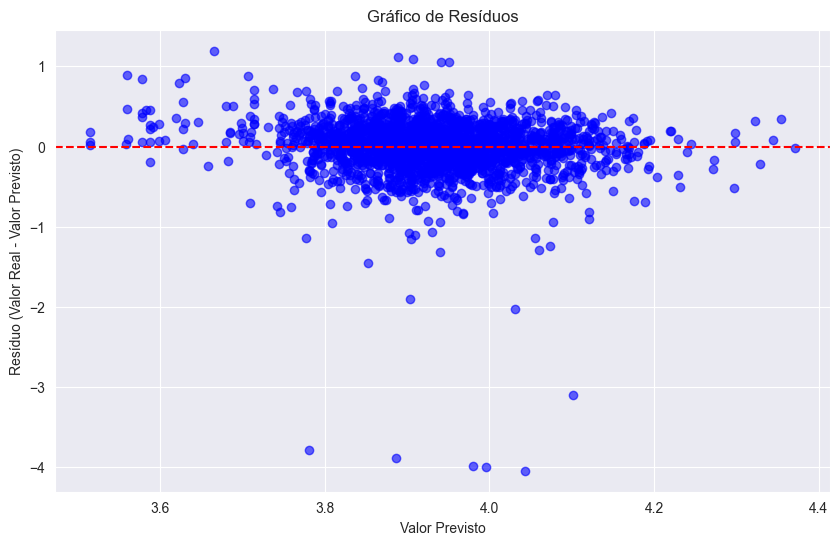

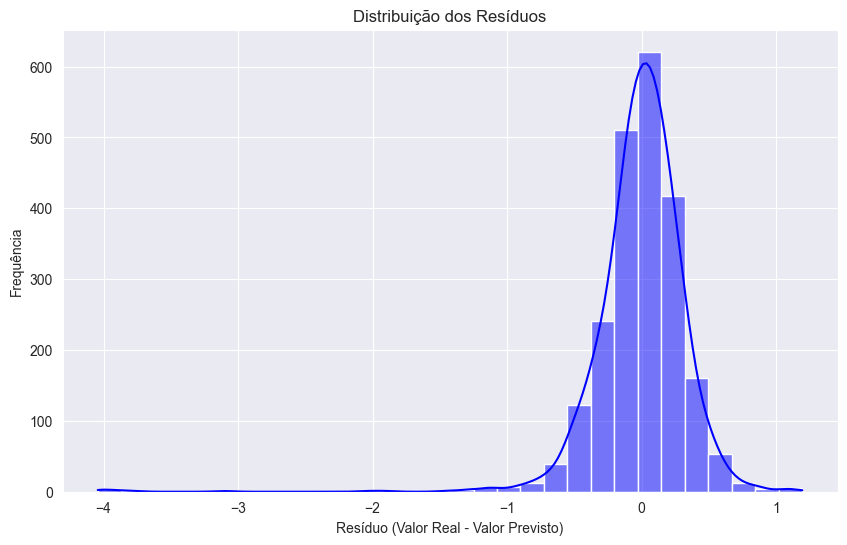

In [937]:
# Gráficos de resíduos
residuos = y_teste - y_previsto

# Gráfico de dispersão de resíduos
plt.figure(figsize=(10, 6))
plt.scatter(y_previsto, residuos, color='blue', alpha=0.6)
plt.axhline(y=0, color='red', linestyle='--')
plt.title('Gráfico de Resíduos')
plt.xlabel('Valor Previsto')
plt.ylabel('Resíduo (Valor Real - Valor Previsto)')
plt.show()

# Gráfico de histograma dos resíduos
plt.figure(figsize=(10, 6))
sns.histplot(residuos, kde=True, color='blue', bins=30)
plt.title('Distribuição dos Resíduos')
plt.xlabel('Resíduo (Valor Real - Valor Previsto)')
plt.ylabel('Frequência')
plt.show()

### LinearRegression

Este código implementa um modelo de Regressão Linear para prever a variável alvo (average_rating) com base em três características: num_pages, ratings_count e text_reviews_count. Os dados são inicialmente divididos em variáveis independentes (X) e dependente (y), seguidos de uma normalização usando o StandardScaler para padronizar as variáveis. Em seguida, os dados são divididos em conjuntos de treino e teste numa proporção de 80/20. O modelo de Regressão Linear é treinado com o conjunto de treino e utilizado para prever os valores do conjunto de teste (y_previsto), permitindo avaliar o desempenho do modelo.

In [938]:
# Seleção das features e variável alvo
features = ['num_pages', 'ratings_count', 'text_reviews_count']
alvo = 'average_rating'

# Divisão dos dados em treino e teste
X = dados[features]
y = dados[alvo]

# Normalização dos dados
escalador = StandardScaler()
X_escalado = escalador.fit_transform(X)

# Divisão em treino e teste
X_treino, X_teste, y_treino, y_teste = train_test_split(X_escalado, y, test_size=0.2, random_state=42)

# Criação e treinamento do modelo de Regressão Linear
regressor = LinearRegression()
regressor.fit(X_treino, y_treino)

# Previsões
y_previsto = regressor.predict(X_teste)

Os resultados indicam que o modelo de Regressão Linear tem um Erro Quadrático Médio (MSE) de 0.122, o que reflete a magnitude média do erro nas previsões do modelo. No entanto, a pontuação R² de 0.025 revela que o modelo explica apenas cerca de 2,5% da variância nos dados. Isto sugere que o modelo tem uma capacidade muito limitada de prever a variável alvo (average_rating) com base nas features selecionadas (num_pages, ratings_count e text_reviews_count), indicando a necessidade de ajustar ou melhorar o modelo, por exemplo, incluindo novas features ou utilizando um modelo mais sofisticado.

In [939]:
# Cálculo do erro quadrático médio e R²
erro_quadratico_medio = mean_squared_error(y_teste, y_previsto)
r2 = r2_score(y_teste, y_previsto)

print(f'Erro Quadrático Médio: {erro_quadratico_medio}')
print(f'Pontuação R²: {r2}')


Erro Quadrático Médio: 0.1223973423523007
Pontuação R²: 0.024927083335106737


O primeiro gráfico é o gráfico de dispersão dos resíduos em relação aos valores previstos. Nele, vemos que os resíduos estão distribuídos de forma aleatória em torno da linha horizontal em y=0, o que é o esperado em um modelo de regressão linear bem ajustado.
O segundo gráfico mostra a distribuição dos resíduos da regressão linear. Podemos ver que a maioria dos resíduos está concentrada entre -1 e 0, com um pico em torno de -0,5. Isso indica que o modelo de regressão linear está ajustando-se bem aos dados, com a maioria dos valores previstos próximos aos valores reais.
Em geral, esses gráficos indicam que o modelo de regressão linear está se ajustando bem aos dados, com resíduos distribuídos de forma aproximadamente normal em torno de zero. Isso sugere que o modelo é adequado para fazer previsões com base nos dados fornecidos.

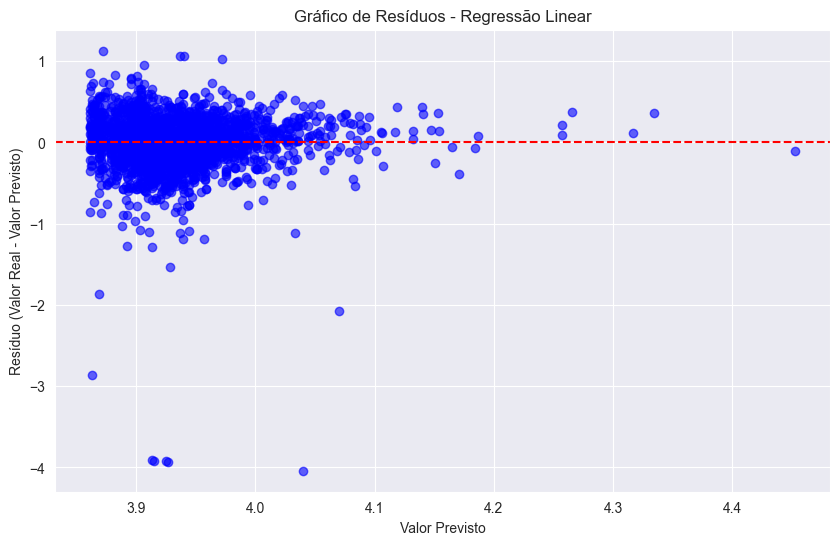

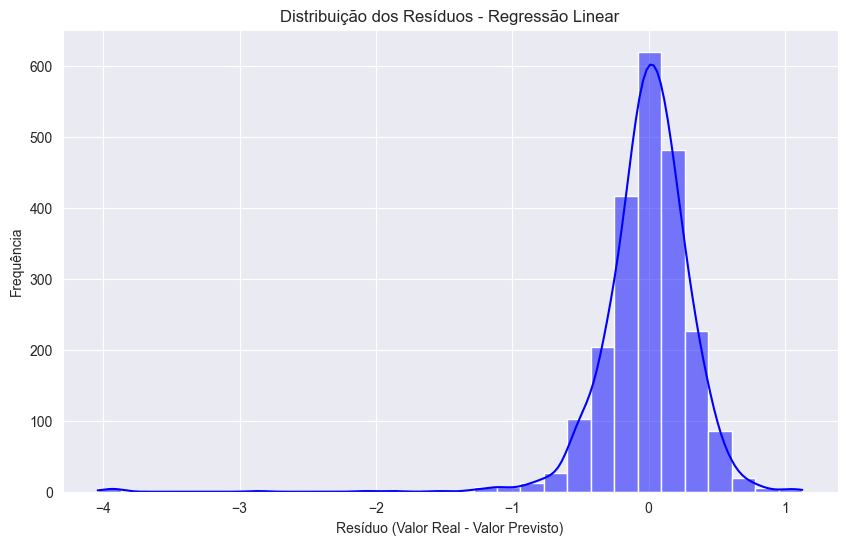

In [940]:
# Gráficos de resíduos
residuos = y_teste - y_previsto

# Gráfico de dispersão de resíduos
plt.figure(figsize=(10, 6))
plt.scatter(y_previsto, residuos, color='blue', alpha=0.6)
plt.axhline(y=0, color='red', linestyle='--')
plt.title('Gráfico de Resíduos - Regressão Linear')
plt.xlabel('Valor Previsto')
plt.ylabel('Resíduo (Valor Real - Valor Previsto)')
plt.show()

# Gráfico de histograma dos resíduos
plt.figure(figsize=(10, 6))
sns.histplot(residuos, kde=True, color='blue', bins=30)
plt.title('Distribuição dos Resíduos - Regressão Linear')
plt.xlabel('Resíduo (Valor Real - Valor Previsto)')
plt.ylabel('Frequência')
plt.show()


# RAC 3
Nós fizemos as seguintes alterações, referente aos 2 primeiros RACs (Abordando alguns comentários do Professor*)
- **RAC1** Redifinição do nome do dataset (**Comentário** arrangem um nome mais completo para o dataset)
- **RAC1 Fase de pré-processamento**
  - Observamos que o dataset necessitava de mais algum pré-processamento, ao tentar realizar o RAC 3.
- **RAC1 Objetivo**, Remoção do antigo ponto 5 (Qual a distribuição dos anos de publicação?) e redifinição do objetivo.
- **RAC1 1.**, Explicação da correlação forte no ponto (**Comentário**  alguma hipótese justificativa da correlação forte?)
- **RAC1 2.**, Aplicação de um gráfico de dispersão (**Comentário**  para medir a relação entre duas quantitativas devem usar um gráfico de dispersão e não extremos e quartis não vejo vantagem nos bins para este objetivo)
- **RAC1 3.**, Redifinição da conclusão (**Comentário** literacia? económica) e alteração da orientação do gráfico (**Comentário** bom gráfico, mas seria preferível fazer barras horizontais para q o texto no eixo dos xx se leia melhor)
- **RAC1 5.**, Adição dos comentários (**Comentário**  Um, gráfico quase perfeito, faltam comentários. Não acham curioso q os livros mais vendidos sejam dirigidos a adolecentes!!)
- **RAC2 3.**, Identificação do outlier e justificação da utilização de 3 outliers. (**Comentário** Vocês fazem umas boas carqcterizaçõe dos clusters. Falta justificar os 3 clusters que acabam por usar. Sabem o q é o outlier com uma classificação muito elevada. Descubram q livro é e escrevam sobre isso. Uma melhor visiualização seria usar um método de redução de dados para extrair os 2 eixos, mas usando todas as features em vez de apenas 2)
- **RAC2 4.** Alteração da orientação dos boxplots. (**Comentário** Muito bom, já encontraram umas pérolas de conhecimento. Se querem box-plots com muito texto no eixo dos xx façam os box-plots na horizontal)
- **RAC2 5.** Utilização do modelo LinearRegression, afinamento dos parâmetros do modelo anterior e realização de gráficos de resíduos (**Comentário** tentem outros modelos, qunatos vizinhos mais póximos? afinem os parâmetros do modelo. façam gráficos de resíduos para avaliar o resultado)

*Os comentários do professor na altura das revisões não estavam a aparecer, ao fim de um tempo nunca mais nos lembramos de ir lá verificar se já estavam. Por isso que na segunda entrega não nos dirigimos aos seus comentários. Visto que não temos muito tempo iremos abordar apenas alguns.

In [941]:
# Importação das bibliotecas
from sklearn.tree import  export_text
from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold
from sklearn.metrics import mean_squared_error, confusion_matrix, classification_report, accuracy_score, mean_absolute_error
from sklearn.preprocessing import OrdinalEncoder, LabelEncoder
from mlxtend.frequent_patterns import fpgrowth, association_rules
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier


## Feature Extraction
Ao elaborar o rac 3 verificamos que a árvore de decisão não estava a ajustar-se bem aos dados, deste modo decidimos realizar
mais algumas feature extraction, afinando assim o modelo, de modo a que o algoritmo consiga obter um melhor resultado.

Calculamos estatísticas como a média das classificações (average_rating), a soma das contagens de avaliações (ratings_count e text_reviews_count) e o número de livros publicados (title). De seguida, cria-se o atributo author_rating_average, que representa a média das classificações por autor, e essa informação é incorporada ao conjunto de dados original através de uma junção (merge). Isto permite análises mais contextuais, relacionando o desempenho de cada livro com a média de classificações do autor.

In [942]:
agrupado = dados.groupby('authors').agg({ 'average_rating': 'mean', 'ratings_count': 'sum', 'text_reviews_count': 'sum', 'title': 'count' })
agrupado['author_rating_average'] = (agrupado['average_rating'])  
dados = pd.merge(dados, agrupado['author_rating_average'], on='authors', how='left')
dados.head(1)

,title,authors,average_rating,language_code,num_pages,ratings_count,text_reviews_count,publication_date,publisher,ratings_per_page,page_group,cluster,nome_cluster,author_rating_average
0,Harry Potter and the Half-Blood Prince (Harry Potter #6),J.K. Rowling/Mary GrandPré,4.57,eng,652,2095690,27591,2006-09-16,Scholastic Inc.,3214.248466,501-700,2,"Cluster 2: Classificação Baixa, Poucas Páginas",4.548333


Esta nova feature agrupa os dados por idioma (language_code) e calcula estatísticas agregadas, como a média das classificações (average_rating), a soma das contagens de avaliações (ratings_count e text_reviews_count) e o número de títulos disponíveis por idioma (title). Em seguida, cria-se o atributo lang_average_rating, que representa a média das classificações para cada idioma, e esta informação é adicionada ao conjunto de dados original através de uma junção (merge). Isto permite análises mais ricas, associando o desempenho de cada livro à média de classificações do idioma em que está publicado.

In [943]:
linguagem_agrupada = dados.groupby('language_code').agg({ 'average_rating': 'mean', 'ratings_count': 'sum', 'text_reviews_count': 'sum', 'title': 'count' }) 
linguagem_agrupada['lang_average_rating'] = (linguagem_agrupada['average_rating'])  
dados = pd.merge(dados, linguagem_agrupada['lang_average_rating'], on='language_code', how='left')
dados.head(1)

,title,authors,average_rating,language_code,num_pages,ratings_count,text_reviews_count,publication_date,publisher,ratings_per_page,page_group,cluster,nome_cluster,author_rating_average,lang_average_rating
0,Harry Potter and the Half-Blood Prince (Harry Potter #6),J.K. Rowling/Mary GrandPré,4.57,eng,652,2095690,27591,2006-09-16,Scholastic Inc.,3214.248466,501-700,2,"Cluster 2: Classificação Baixa, Poucas Páginas",4.548333,3.931103


Este feature contém apenas o ano de publicação extraído da coluna publication_date. Para isso, a data original é convertida para o formato de data e hora (datetime), e o ano é isolado usando .dt.year. Esta nova coluna facilita análises temporais, como a identificação de tendências ou padrões relacionados ao ano de publicação dos livros. Em seguida, os primeiros cinco registos e a estrutura do conjunto de dados são visualizados com head(5) e info().

In [944]:
dados['publication_year'] = pd.to_datetime(dados['publication_date']).dt.year
dados.head(5)
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11117 entries, 0 to 11116
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   title                  11117 non-null  object        
 1   authors                11117 non-null  object        
 2   average_rating         11117 non-null  float64       
 3   language_code          11117 non-null  object        
 4   num_pages              11117 non-null  int64         
 5   ratings_count          11117 non-null  int64         
 6   text_reviews_count     11117 non-null  int64         
 7   publication_date       11115 non-null  datetime64[ns]
 8   publisher              11117 non-null  object        
 9   ratings_per_page       11117 non-null  float64       
 10  page_group             11032 non-null  category      
 11  cluster                11117 non-null  int32         
 12  nome_cluster           11117 non-null  object        
 13  a

## Algoritmo não supervisionado


O resultado apresentado mostra um conjunto de regras de associação geradas pelo algoritmo FP-Growth, aplicadas aos dados de livros. Cada linha da tabela representa uma regra de associação, com os antecedentes e consequentes, o suporte (a frequência com que a combinação ocorre no conjunto de dados), a confiança (a probabilidade de um antecedente gerar o consequente), o lift (a razão de ocorrência conjunta em relação à expectativa), entre outras métricas.

As regras mais relevantes, selecionadas com base em valores de lift superiores a 1 e confiança superior a 0.8, indicam que existe uma forte relação entre certas variáveis, como a relação entre a classificação média do idioma (lang_average_rating) e a classificação média do autor (author_rating_average), que tem um lift próximo de 1 e uma confiança muito alta, sugerindo que esses atributos estão frequentemente associados entre si no conjunto de dados. Além disso, as regras com confiança e lift elevados sugerem padrões consistentes de associação entre atributos como a classificação do autor e o ano de publicação. Essas associações podem ser úteis para identificar tendências ou relações ocultas entre diferentes características dos livros analisados.

In [945]:
# Seleção das features
features = ['num_pages', 'average_rating', 'ratings_count', 'text_reviews_count', 'author_rating_average', 'lang_average_rating', 'publication_year']
dados_fpgrowth = dados[features]

# Transformação dos dados categóricos em numéricos
encoder = OrdinalEncoder()
dados_fpgrowth.loc[:, 'publication_year'] = dados_fpgrowth['publication_year'].fillna(0)
dados_fpgrowth.loc[:, 'publication_year'] = encoder.fit_transform(dados_fpgrowth[['publication_year']])
dados_fpgrowth.loc[:, 'publication_year'] = dados_fpgrowth['publication_year'].astype(int)


# Binarização dos dados
dados_binarizados = dados_fpgrowth > 0
dados_binarizados = dados_binarizados.astype(bool) 

# Aplicação do algoritmo FP-Growth
frequent_itemsets = fpgrowth(dados_binarizados, min_support=0.1, use_colnames=True)

# Criação das regras de associação
regras_associacao = association_rules(frequent_itemsets,num_itemsets=frequent_itemsets, metric='confidence', min_threshold=0.1)

regras_relevantes = regras_associacao[
    (regras_associacao['lift'] > 1) & 
    (regras_associacao['confidence'] > 0.8)
]

regras_relevantes.head(5)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,representativity,leverage,conviction,zhangs_metric,jaccard,certainty,kulczynski
2,(author_rating_average),(lang_average_rating),0.997841,0.999910,0.997841,1.000000,1.00009,1.0,0.000090,inf,0.041667,0.997931,1.000000,0.998965
3,(lang_average_rating),(author_rating_average),0.999910,0.997841,0.997841,0.997931,1.00009,1.0,0.000090,1.043384,1.000000,0.997931,0.041580,0.998965
6,"(publication_year, author_rating_average)",(lang_average_rating),0.997661,0.999910,0.997661,1.000000,1.00009,1.0,0.000090,inf,0.038462,0.997751,1.000000,0.998875
7,"(publication_year, lang_average_rating)",(author_rating_average),0.999730,0.997841,0.997661,0.997931,1.00009,1.0,0.000089,1.043197,0.331951,0.997751,0.041408,0.998875
10,(author_rating_average),"(publication_year, lang_average_rating)",0.997841,0.999730,0.997661,0.999820,1.00009,1.0,0.000089,1.496762,0.041494,0.997751,0.331891,0.998875


## Pré-processamento

Utilizamos o OrdinalEncoder para transformar a coluna language_code, que contém dados categóricos (como códigos de idioma), em valores numéricos ordenados. Esta transformação é útil para preparar os dados para algoritmos de machine learning que requerem entradas numéricas.

In [946]:
dados = dados.copy()
enc = OrdinalEncoder()
enc.fit(dados[['language_code']])
dados[['language_code']] = enc.fit_transform(dados[['language_code']])

label_encoder = LabelEncoder()
dados['authors'] = label_encoder.fit_transform(dados['authors'])

Removemos as colunas (publication_date, publisher, ratings_per_page, page_group, cluster, nome_cluster) do conjunto de dados dados, escolhemos remover estas colunas em especifico porque não são relevantes para a nossa pesquisa e necessitam de processamento adicional . O parâmetro errors='ignore' garante que, se alguma destas colunas não existir no DataFrame, não será gerado um erro. Após a remoção, o conjunto de dados resultante é apresentado.

In [947]:
dados = dados.drop(columns=['publisher', 'publication_date', 'page_group', 'cluster', 'nome_cluster','ratings_per_page'], errors='ignore')
dados.head(5)

,title,authors,average_rating,language_code,num_pages,ratings_count,text_reviews_count,author_rating_average,lang_average_rating,publication_year
0,Harry Potter and the Half-Blood Prince (Harry Potter #6),2626,4.57,2.0,652,2095690,27591,4.548333,3.931103,2006.0
1,Harry Potter and the Order of the Phoenix (Harry Potter #5),2626,4.49,2.0,870,2153167,29221,4.548333,3.931103,2004.0
2,Harry Potter and the Chamber of Secrets (Harry Potter #2),2622,4.42,2.0,352,6333,244,4.513636,3.931103,2003.0
3,Harry Potter and the Prisoner of Azkaban (Harry Potter #3),2626,4.56,2.0,435,2339585,36325,4.548333,3.931103,2004.0
4,Harry Potter Boxed Set Books 1-5 (Harry Potter #1-5),2626,4.78,2.0,2690,41428,164,4.548333,3.931103,2004.0


# Árvore de decisão (regressão)

In [948]:
# Selecionar variáveis independentes (X) e dependentes (y)
X = dados[['num_pages', 'ratings_count', 'author_rating_average', 'lang_average_rating', 'authors', 'text_reviews_count', 'publication_year']]
y = dados['average_rating']  # Variável contínua (média da avaliação)

# Dividir os dados em treino e teste
X_treino, X_teste, y_treino, y_teste = train_test_split(X, y, test_size=0.2, random_state=42)

# Criar o modelo de árvore de decisão de regressão
ad_regressao = RandomForestRegressor(random_state=42)

# Treinar a árvore de decisão
ad_regressao.fit(X_treino, y_treino)

# Prever no conjunto de teste
y_previsto = ad_regressao.predict(X_teste)

Os resultados das métricas de regressão indicam que o modelo de Árvore de Decisão apresenta um bom desempenho. O Erro Absoluto Médio (MAE) de 0.073 sugere que, em média, as previsões do modelo estão muito próximas dos valores reais, com um desvio médio de apenas 0.073 pontos. O Erro Quadrático Médio (MSE) de 0.017 confirma a precisão do modelo e indica que ele é eficaz em minimizar grandes erros, penalizando desvios maiores. Por fim, o Coeficiente de Determinação (R²) de 0.862 revela que aproximadamente 86,2% da variabilidade da média de avaliações é explicada pelas variáveis independentes (num_pages, ratings_count e author_rating_average). Esses resultados indicam que o modelo é eficaz em capturar os padrões dos dados, embora ainda haja uma pequena margem para melhorias.

In [949]:
# Avaliar o modelo (usando métricas de regressão)
mae = mean_absolute_error(y_teste, y_previsto)
mse = mean_squared_error(y_teste, y_previsto)
r2 = r2_score(y_teste, y_previsto)

print(f"\nMétricas de Regressão:")
print(f"Erro Absoluto Médio (MAE): {mae}")
print(f"Erro Quadrático Médio (MSE): {mse}")
print(f"Coeficiente de Determinação (R²): {r2}")


Métricas de Regressão:
Erro Absoluto Médio (MAE): 0.07278261840527579
Erro Quadrático Médio (MSE): 0.01726024520004745
Coeficiente de Determinação (R²): 0.8624970337908229


O gráfico de resíduos mostra como os erros do modelo se comportam em relação aos valores previstos. O ideal seria que os pontos estivessem espalhados de forma aleatória em torno da linha vermelha (que representa zero), mas aqui dá para ver que, à medida que os valores previstos aumentam, os resíduos ficam mais concentrados e variam mais. Isso pode ser um sinal de que o modelo não está a funcionar tão bem para prever valores mais altos, ou seja, os erros tornam-se menos consistentes.

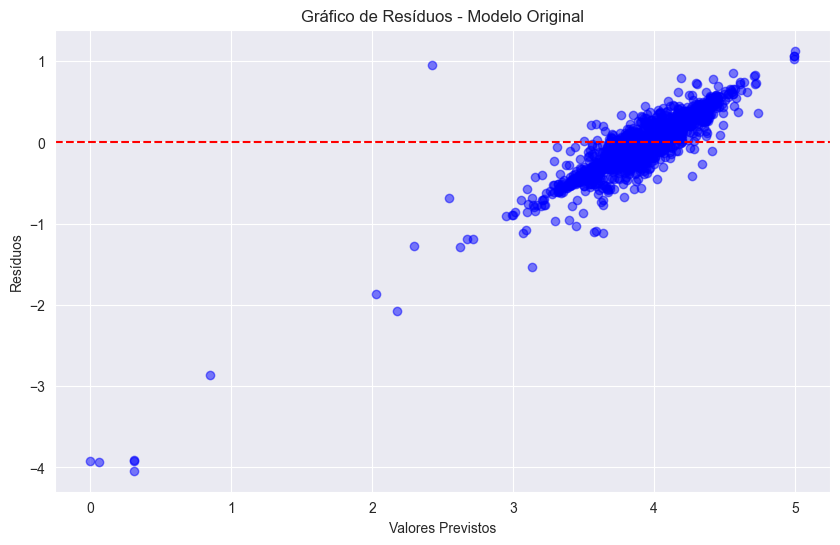

In [950]:
plt.figure(figsize=(10, 6))
plt.scatter(y_previsto, residuos, color='blue', alpha=0.5)
plt.axhline(y=0, color='red', linestyle='--')
plt.title("Gráfico de Resíduos - Modelo Original")
plt.xlabel("Valores Previstos")
plt.ylabel("Resíduos")
plt.show()

O código abaixo realiza a afinação do hiperparâmetro ccp_alpha do modelo de árvore de decisão para regressão, utilizando o método de Grid Search com validação cruzada. O objetivo é encontrar o valor ideal de ccp_alpha, que controla a poda da árvore. A poda é essencial para reduzir o overfitting, já que impede que a árvore se ajuste demasiado aos dados de treino, o que pode comprometer a sua capacidade de generalização. São testados diferentes valores de ccp_alpha ([0.0, 0.01, 0.05, 0.1, 0.2]) e, através de uma validação cruzada com 5 divisões, o modelo é treinado e avaliado para cada valor. No final, o melhor valor de ccp_alpha é selecionado com base no desempenho, ajudando a obter um modelo mais equilibrado e robusto.

In [951]:
# Ajustar o parâmetro ccp_alpha para podar a árvore e evitar overfitting
# Realizar GridSearch para encontrar o melhor valor de ccp_alpha
grid_parametro = {'ccp_alpha': [0.0, 0.01, 0.05, 0.1, 0.2]}
grid_pesquisa_regressao = GridSearchCV(RandomForestRegressor(random_state=42), grid_parametro, cv=5)
grid_pesquisa_regressao.fit(X_treino, y_treino)

# Melhor parâmetro encontrado
print("\nMelhor valor de ccp_alpha para a árvore de regressão:", grid_pesquisa_regressao.best_params_)


Melhor valor de ccp_alpha para a árvore de regressão: {'ccp_alpha': 0.0}


In [952]:
# Treinar o modelo com o melhor ccp_alpha
melhor_dt_regressao = grid_pesquisa_regressao.best_estimator_
melhor_dt_regressao.fit(X_treino, y_treino)

# Prever no conjunto de teste com a árvore podada
y_previsto_podado = melhor_dt_regressao.predict(X_teste)

Ao comparar as métricas de regressão antes e após a poda, observa-se que os valores permaneceram inalterados. O Erro Absoluto Médio (MAE) continua em 0.073, o Erro Quadrático Médio (MSE) mantém-se em 0.017, e o Coeficiente de Determinação (R²) permanece elevado, em 0.862.
O processo de poda demonstrou ser extremamente eficiente, simplificando a estrutura da árvore de decisão sem comprometer a sua capacidade preditiva. Isso significa que o modelo conseguiu reduzir a sua complexidade ao eliminar ramificações menos relevantes, mas preservou integralmente o seu poder de previsão.

In [953]:
# Avaliar o modelo podado
mae_podada = mean_absolute_error(y_teste, y_previsto_podado)
mse_podada = mean_squared_error(y_teste, y_previsto_podado)
r2_podada = r2_score(y_teste, y_previsto_podado)

print(f"\nMétricas de Regressão (Árvore Podada):")
print(f"Erro Absoluto Médio (MAE): {mae_podada}")
print(f"Erro Quadrático Médio (MSE): {mse_podada}")
print(f"Coeficiente de Determinação (R²): {r2_podada}")


Métricas de Regressão (Árvore Podada):
Erro Absoluto Médio (MAE): 0.07278261840527579
Erro Quadrático Médio (MSE): 0.01726024520004745
Coeficiente de Determinação (R²): 0.8624970337908229


Ao comparar os gráficos de resíduos do modelo original e do modelo podado, algumas diferenças importantes ficam evidentes:
No modelo original, o gráfico apresenta uma dispersão consideravelmente maior dos resíduos em relação ao eixo horizontal. Há diversos pontos que se afastam muito da linha central em torno de 0, indicando uma maior discrepância entre os valores previstos e os valores reais.
Além disso, é possível observar uma tendência de curvatura nos resíduos, especialmente para valores previstos mais altos. Isso sugere que o modelo original pode não estar captando adequadamente alguma relação não linear presente nos dados.
Já no modelo podado, o gráfico mostra uma distribuição muito mais concentrada e aleatória dos resíduos em torno de 0. Não há a mesma tendência curvilínea observada no modelo original, o que indica que o processo de poda ajudou a melhorar o ajuste do modelo aos pressupostos de linearidade.

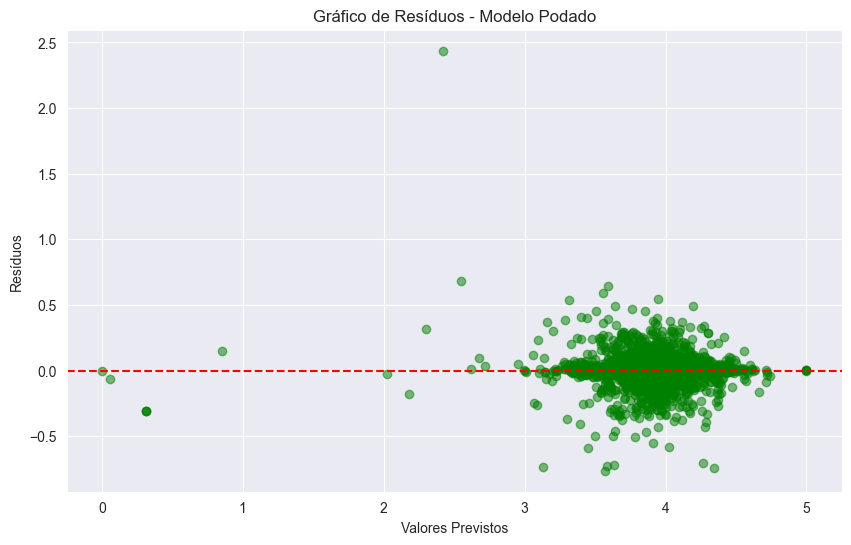

In [954]:
residuos_podados = y_teste - y_previsto_podado

plt.figure(figsize=(10, 6))
plt.scatter(y_previsto_podado, residuos_podados, color='green', alpha=0.5)
plt.axhline(y=0, color='red', linestyle='--')
plt.title("Gráfico de Resíduos - Modelo Podado")
plt.xlabel("Valores Previstos")
plt.ylabel("Resíduos")
plt.show()

Nos dados que temos aqui, o valor que mais se destaca é na Linha 5905, onde temos yteste=1, yprevisto_podado=0 e um Resíduo = 2.4369; isto é o mais significativo porque tem o maior resíduo absoluto (∣2.4369∣), o que quer dizer que o modelo fez uma previsão muito longe do valor real.

In [955]:
df_residuos = pd.DataFrame({
    'y_teste': y_teste,
    'y_previsto_podado': y_previsto_podado,
    'residuos': residuos_podados
})

limite = 3 * np.std(residuos_podados)

outliers = df_residuos[np.abs(df_residuos['residuos']) > limite]

print("Outliers encontrados:")
print(outliers)

Outliers encontrados:
       y_teste  y_previsto_podado  residuos
149       3.44             4.0243   -0.5843
1285      4.23             3.5889    0.6411
10081     3.18             3.6405   -0.4605
9161      2.86             3.4491   -0.5891
10421     3.00             3.4975   -0.4975
6128      3.96             3.5044    0.4556
4043      3.13             3.6260   -0.4960
1347      3.39             3.8585   -0.4685
4292      4.13             3.6404    0.4896
5477      3.85             4.2820   -0.4320
4246      3.56             4.2668   -0.7068
8177      4.69             4.1945    0.4955
96        2.99             3.3954   -0.4054
4421      3.36             3.9102   -0.5502
10141     2.92             3.6362   -0.7162
7319      3.84             3.4403    0.3997
9717      3.23             2.5469    0.6831
7529      4.23             3.7637    0.4663
5758      4.15             3.5550    0.5950
8806      2.40             3.1312   -0.7312
4219      3.28             3.7842   -0.5042
2589      

O valor que mais salta à vista aqui é o **ratings_count (5)**, já que tem muito poucas avaliações comparando com a média alta (4.86), o que sugere que o livro não tem grande visibilidade ou está há pouco tempo disponível; outros possíveis valores fora do normal podem ser o **text_reviews_count (0)** e a **author_rating_average (2.93)**, que também mostram que talvez não haja muito interesse pelo autor ou comentários desenvolvidos, mesmo tendo o livro uma boa avaliação.

In [956]:
linha_5905 = dados.loc[5905]

linha_5905_copia = linha_5905.copy()

linha_5905_copia['authors'] = label_encoder.inverse_transform([linha_5905_copia['authors']])[0]
linha_5905_copia['language_code'] = enc.inverse_transform([[linha_5905_copia['language_code']]])[0][0]

print(linha_5905_copia)

title                    Stargirl LitPlans on CD
authors                          Mary B. Collins
average_rating                              4.86
language_code                                eng
num_pages                                    210
ratings_count                                  5
text_reviews_count                             0
author_rating_average                       2.93
lang_average_rating                     3.931103
publication_year                          2005.0
Name: 5905, dtype: object


## Árvore de decisão (classificação)

In [957]:
# Definir a variável alvo (alta ou baixa avaliação)
linguagens_originais = enc.inverse_transform(dados['language_code'].values.reshape(-1, 1)).ravel()
dados['language_code'] = linguagens_originais

# Selecionar variáveis independentes (X) e dependentes (y)
X = dados[['num_pages', 'ratings_count', 'author_rating_average']]
y = dados['language_code']

# Dividir os dados em treino e teste
X_treino, X_teste, y_treino, y_teste = train_test_split(X, y, test_size=0.2, random_state=42)

# Criar o modelo de árvore de decisão
dt = RandomForestClassifier(random_state=42, class_weight='balanced')

# Treinar a árvore de decisão
dt.fit(X_treino, y_treino)

# Prever no conjunto de teste
y_previsto = dt.predict(X_teste)

A matriz de confusão mostra que o modelo tem um bom desempenho em prever alguns idiomas, como "eng" (inglês), mas apresenta dificuldades para prever outros idiomas, como "spa" (espanhol), com muitos erros de classificação, visto que não existe muitos dados acerca dos mesmos.

In [958]:
# Avaliar o modelo
matriz_confusao = confusion_matrix(y_teste, y_previsto)
print("Matriz de Confusão:")
for linha in matriz_confusao:
    print(" ".join([f"{valor:4d}" for valor in linha]))


Matriz de Confusão:
   0    1    0    0    0    0    0    0    0    0    0    0    0
   0 2108    0    2    0    0    0    0    0    0    2    0    0
   0   27    1    0    0    0    0    0    0    0    0    0    0
   0   12    0    0    0    0    0    0    0    0    0    0    0
   0    2    0    0    0    0    0    0    0    0    0    0    0
   0    7    0    0    0    6    0    0    0    0    0    0    0
   0    5    0    0    0    0    0    0    0    0    0    0    0
   0    1    0    0    0    0    0    0    0    0    0    0    0
   0    1    0    0    0    0    0    0    0    0    0    0    0
   0    3    0    0    0    0    0    0    0    0    0    0    0
   0   43    0    1    0    0    0    0    0    0    0    0    0
   0    1    0    0    0    0    0    0    0    0    0    0    0
   0    1    0    0    0    0    0    0    0    0    0    0    0


O relatório de classificação mostra um desempenho geral elevado, com 95% de precisão e um F1-score ponderado de 93%, mas isso é fortemente influenciado pela classe dominante (eng), que representa a maioria dos dados.
As classes minoritárias, como ara, fre, ger, e outras, apresentam recall e F1-score próximos de zero, indicando que o modelo falhou em prever corretamente essas categorias. Apenas a classe jpn (japonês) teve um desempenho moderado, com 46% de recall e 63% de F1-score.
Esse desempenho desigual é causado principalmente pelo desequilíbrio de classes no conjunto de dados. A classe dominante (eng) possui 2112 instâncias, enquanto outras classes têm números muito pequenos, como ger (12), fre (28), e jpn (13). Isso faz com que o modelo priorize a classe majoritária para maximizar a precisão geral e tenha dificuldade em aprender padrões robustos para as classes com menos exemplos.

In [959]:
# Relatório de Classificação
print("\nRelatório de Classificação:")
print(classification_report(y_teste, y_previsto, zero_division=1))


Relatório de Classificação:
              precision    recall  f1-score   support

         ara       1.00      0.00      0.00         1
         eng       0.95      1.00      0.98      2112
         fre       1.00      0.04      0.07        28
         ger       0.00      0.00      0.00        12
         grc       1.00      0.00      0.00         2
         jpn       1.00      0.46      0.63        13
         mul       1.00      0.00      0.00         5
          nl       1.00      0.00      0.00         1
         nor       1.00      0.00      0.00         1
         por       1.00      0.00      0.00         3
         spa       0.00      0.00      0.00        44
         swe       1.00      0.00      0.00         1
         zho       1.00      0.00      0.00         1

    accuracy                           0.95      2224
   macro avg       0.84      0.12      0.13      2224
weighted avg       0.93      0.95      0.93      2224



In [960]:
# Calcular a Precisão
precisao = accuracy_score(y_teste, y_previsto)
print(f"Precisão: {precisao}")

Precisão: 0.9509892086330936


O processo de ajuste do parâmetro `ccp_alpha` utilizando o **GridSearchCV** e **StratifiedKFold** revelou que o melhor valor encontrado para esse parâmetro foi `ccp_alpha = 0.0`. Isso significa que, ao ajustar o modelo de **RandomForestClassifier**, o modelo não realizou poda, ou seja, não houve restrição à complexidade das árvores.

In [961]:
# Ajustar o parâmetro ccp_alpha para podar a árvore e evitar overfitting
# Realizar GridSearch para encontrar o melhor valor de ccp_alpha
skf = StratifiedKFold(n_splits=5)
grid_parametros = {'ccp_alpha': [0.0, 0.01, 0.05, 0.1, 0.2]}
pesquisa_grid = GridSearchCV(RandomForestClassifier(random_state=42), grid_parametros, cv=skf)
pesquisa_grid.fit(X_treino, y_treino)

# Melhor parâmetro encontrado
print("\nMelhor valor de ccp_alpha:", pesquisa_grid.best_params_)

S:\Code\Futurismo\.venv1\Lib\site-packages\sklearn\model_selection\_split.py:776: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(



Melhor valor de ccp_alpha: {'ccp_alpha': 0.0}


In [962]:
# Treinar o modelo com o melhor ccp_alpha
melhor_dt = pesquisa_grid.best_estimator_
melhor_dt.fit(X_treino, y_treino)

# Prever no conjunto de teste
y_previsto_podado = melhor_dt.predict(X_teste)


A matriz de confusão podada mostra a performance do modelo de Random Forest após a aplicação do parâmetro ccp_alpha (com valor 0.0) que controla a poda das árvores de decisão no modelo. A poda é uma técnica utilizada para reduzir a complexidade do modelo, e neste caso, o modelo não foi podado (já que ccp_alpha é 0.0), o que pode indicar que o modelo não apresentou overfitting e estava bem ajustado mesmo sem a poda.

In [963]:
# Avaliar o modelo podado
matriz_confusao_podada = confusion_matrix(y_teste, y_previsto_podado)
print("Matriz de Confusão Podada:")
for linha in matriz_confusao_podada:
    print(" ".join([f"{valor:4d}" for valor in linha]))

Matriz de Confusão Podada:
   0    1    0    0    0    0    0    0    0    0    0    0    0
   0 2108    0    2    0    0    0    0    0    0    2    0    0
   0   27    1    0    0    0    0    0    0    0    0    0    0
   0   11    0    1    0    0    0    0    0    0    0    0    0
   0    2    0    0    0    0    0    0    0    0    0    0    0
   0    6    0    0    0    7    0    0    0    0    0    0    0
   0    5    0    0    0    0    0    0    0    0    0    0    0
   0    1    0    0    0    0    0    0    0    0    0    0    0
   0    1    0    0    0    0    0    0    0    0    0    0    0
   0    3    0    0    0    0    0    0    0    0    0    0    0
   0   43    1    0    0    0    0    0    0    0    0    0    0
   0    1    0    0    0    0    0    0    0    0    0    0    0
   0    1    0    0    0    0    0    0    0    0    0    0    0


O relatório de classificação mostra que a árvore de decisão podada apresenta um desempenho sólido e equilibrado entre as duas classes. Com uma acurácia geral de 91%, o modelo atinge uma precisão de 91% para ambas as classes, indicando que a maioria das previsões estão corretas. A revocação é ligeiramente maior para a classe 0 (93%) do que para a classe 1 (88%), refletindo uma capacidade levemente superior de identificar corretamente os exemplos reais da classe 0. O F1-score, que combina precisão e revocação, é de 92% para a classe 0 e 89% para a classe 1, destacando um desempenho consistente.

In [964]:
# Relatório de Classificação para a árvore podada
print("\nRelatório de Classificação (Árvore Podada):")
print(classification_report(y_teste, y_previsto_podado, zero_division=1))



Relatório de Classificação (Árvore Podada):
              precision    recall  f1-score   support

         ara       1.00      0.00      0.00         1
         eng       0.95      1.00      0.98      2112
         fre       0.50      0.04      0.07        28
         ger       0.33      0.08      0.13        12
         grc       1.00      0.00      0.00         2
         jpn       1.00      0.54      0.70        13
         mul       1.00      0.00      0.00         5
          nl       1.00      0.00      0.00         1
         nor       1.00      0.00      0.00         1
         por       1.00      0.00      0.00         3
         spa       0.00      0.00      0.00        44
         swe       1.00      0.00      0.00         1
         zho       1.00      0.00      0.00         1

    accuracy                           0.95      2224
   macro avg       0.83      0.13      0.14      2224
weighted avg       0.93      0.95      0.93      2224



In [965]:
# Calcular a Precisão para a árvore podada
precisao_podada = accuracy_score(y_teste, y_previsto_podado)
print(f"Precisão (Árvore Podada): {precisao_podada}")

Precisão (Árvore Podada): 0.9518884892086331


# Rede neuronal

In [993]:
# Importação das Bibliotecas
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam

## Preparação dos Dados
O conjunto de dados foi dividido em duas partes: um conjunto de treino e um conjunto de teste. O conjunto de treino, utilizado para ajustar o modelo, contém 8.893 amostras e 3 variáveis independentes (características), enquanto o conjunto de teste, destinado a avaliar o desempenho do modelo após o treinamento, possui 2.224 amostras e as mesmas 3 variáveis independentes. A divisão foi feita de forma aleatória, com 20% dos dados alocados para o teste e 80% para o treino.

In [1003]:
# Definir as variáveis independentes (X) e dependentes (y)
X = dados[['num_pages', 'ratings_count', 'author_rating_average']]  # Variáveis independentes
y = dados['average_rating']  # Variável dependente

# Normalizando as variáveis independentes
scaler = StandardScaler()
X_normalizado = scaler.fit_transform(X)

# Dividir os dados em treino e teste
X_treino, X_teste, y_treino, y_teste = train_test_split(X_normalizado, y, test_size=0.2, random_state=42)

print(f'Tamanho do conjunto de treino: {X_treino.shape}')
print(f'Tamanho do conjunto de teste: {X_teste.shape}')

Tamanho do conjunto de treino: (8893, 3)
Tamanho do conjunto de teste: (2224, 3)


## Construção do Modelo da Rede Neuronal
O modelo criado é uma rede neural sequencial com três camadas. A primeira camada oculta, com 64 neurônios e função de ativação "ReLU", recebe as entradas do modelo, que possuem 3 características. A segunda camada oculta tem 32 neurônios, também com a ativação "ReLU". A camada de saída, com um único neurônio e função de ativação "linear", é adequada para tarefas de regressão, como a previsão da variável dependente "average_rating". O modelo possui um total de 2.369 parâmetros treináveis, que são ajustados durante o processo de treinamento. Esses parâmetros incluem os pesos e os vieses das camadas. Não há parâmetros não treináveis.

In [1004]:
modelo = Sequential()

modelo.add(Dense(64, input_dim=X_treino.shape[1], activation='relu'))

modelo.add(Dense(32, activation='relu'))

modelo.add(Dense(1, activation='linear'))

modelo.summary()

S:\Code\Futurismo\.venv1\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_12"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_36 (Dense)                │ (None, 64)             │           256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_37 (Dense)                │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_38 (Dense)                │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,369 (9.25 KB)

 Trainable params: 2,369 (9.25 KB)

 Non-trainable params: 0 (0.00 B)

## Compilação do Modelo

In [1005]:
modelo.compile(loss='mean_squared_error',
               optimizer=Adam(),
               metrics=['mae'])

## Treino do modelo
Com base nos gráficos de treinamento e nos resultados apresentados, o modelo demonstrou um excelente desempenho. As curvas de loss (MSE) e MAE mostram uma rápida convergência logo nas primeiras épocas, mantendo-se estáveis ao longo do treinamento, o que indica que o modelo aprendeu eficientemente os padrões dos dados. O erro médio absoluto (MAE) final no conjunto de teste foi de 0,0905, um valor bastante baixo que sugere alta precisão nas previsões. Além disso, as curvas de validação acompanham de perto as curvas de treinamento, sem sinais de overfitting, demonstrando que o modelo generaliza bem para dados não vistos. A loss final de 0,0196 também corrobora a qualidade do ajuste do modelo aos dados.

Epoch 1/50
278/278 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 7.0019 - mae: 2.2537 - val_loss: 0.2040 - val_mae: 0.2759
Epoch 2/50
278/278 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.1264 - mae: 0.1928 - val_loss: 0.0281 - val_mae: 0.1113
Epoch 3/50
278/278 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0246 - mae: 0.1054 - val_loss: 0.0209 - val_mae: 0.0960
Epoch 4/50
278/278 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0206 - mae: 0.0916 - val_loss: 0.0182 - val_mae: 0.0862
Epoch 5/50
278/278 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0186 - mae: 0.0862 - val_loss: 0.0183 - val_mae: 0.0821
Epoch 6/50
278/278 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0183 - mae: 0.0851 - val_loss: 0.0170 - val_mae: 0.0796
Epoch 7/50
278/278 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0167 - mae: 0.0798 - val_loss: 0.0187 - val_mae: 0.0784
Epoch 8/50
278/278 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0283 - mae: 0.0907 - val_loss: 0.0162 - val_mae: 0.0765
Epoch 9/50
278/278 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - lo

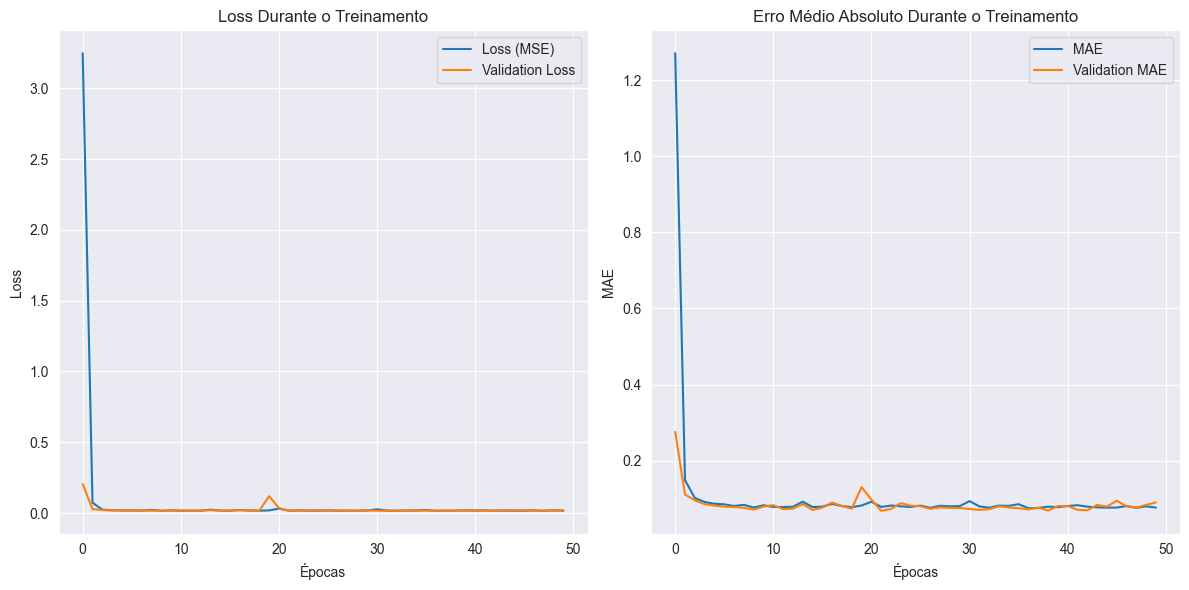

In [1006]:
historico = modelo.fit(X_treino, y_treino, epochs=50, batch_size=32, validation_data=(X_teste, y_teste))

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(historico.history['loss'], label='Loss (MSE)')
plt.plot(historico.history['val_loss'], label='Validation Loss')
plt.title('Loss Durante o Treino')
plt.xlabel('Épocas')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(historico.history['mae'], label='MAE')
plt.plot(historico.history['val_mae'], label='Validation MAE')
plt.title('Erro Médio Absoluto Durante o Treino')
plt.xlabel('Épocas')
plt.ylabel('MAE')
plt.legend()

plt.tight_layout()
plt.show()

## Avaliação do Modelo

In [1007]:
score = modelo.evaluate(X_teste, y_teste)
print(f"Erro Médio Absoluto (MAE) no conjunto de teste: {score[1]:.4f}")

70/70 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0196 - mae: 0.0908
Erro Médio Absoluto (MAE) no conjunto de teste: 0.0905
